In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [50]:
df = pd.read_csv('model_results/metric_results.csv', index_col=0)
df_timeseries = pd.read_csv('model_results/metric_results_unique_id.csv', index_col=0)
num_timeseries = {'amazon-google':20, 'glucose':16, 'm5':70, 'meditation':6}
metrics = ['mase', 'wql', 'pce', 'mpiqr']
# metrics = ['tce_20', 'tce_40', 'tce_60', 'tce_80']
# datasets = np.unique(df['dataset'])
# models = np.unique(df['model'])
datasets = ['amazon-google', 'meditation', 'm5', 'glucose']
models = ['timesfm', 'moirai', 'chronos', 'lag-llama', 'nbeats', 'autoarima']
# model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'][:len(models)]
model_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']
dataset_markers = ['o', 'v', '*', 'P']
confidences = [20,40,60,80]
# models = ['timesfm64', 'moirai64', 'chronos64', 'lag-llama', 'nbeats', 'autoarima']
# models = ['timesfm', 'moirai', 'chronos', 'nbeats', 'autoarima']
df

dataset      model    metric  avg_result         1         2  \
0    amazon-google    timesfm      mase    0.626710  0.430666  0.500570   
1    amazon-google    timesfm       wql   39.109267  0.569183  0.662820   
2    amazon-google    timesfm       pce    0.030145  0.011274  0.008685   
3    amazon-google    timesfm     mpiqr    0.179825  0.147943  0.158860   
4    amazon-google    timesfm    tce_80    0.014083  0.013927  0.014583   
..             ...        ...       ...         ...       ...       ...   
571     meditation  autoarima  mpiqr_20    3.186103  1.466969  1.886740   
572     meditation  autoarima     tce_0    0.015244  0.006689  0.010067   
573     meditation  autoarima    msiw_0    0.000000  0.000000  0.000000   
574     meditation  autoarima    msis_0    2.295389  1.456756  1.895431   
575     meditation  autoarima   mpiqr_0         NaN       NaN       NaN   

            3         4         5         6  ...        39        40  \
0    0.533389  0.549497  0.558109  0.564419  ...  0.670660  0.664018   
1    0.702529  0.721602  0.731187  0.739626  ...  0.863626  0.857371   
2    0.008188  0.009611  0.020062  0.007527  ...  0.044444  0.035854   
3    0.164309  0.170129  0.172340  0.173008  ...  0.189807  0.187360   
4    0.008565  0.006713  0.007330  0.004514  ...  0.020023  0.015355   
..        ...       ...       ...       ...  ...       ...       ...   
571  1.965936  2.002759  2.110117  2.239466  ...  3.891131  3.929816   
572  0.003928  0.003941  0.005650  0.006803  ...  0.013410  0.014103   
573  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
574  1.983854  2.020059  2.123753  2.223431  ...  2.520658  2.496842   
575       NaN       NaN       NaN       NaN  ...       NaN       NaN   

           41        42        43        44        45        46        47  \
0    0.669928  0.669465  0.672305  0.673199  0.673113  0.677770  0.674093   
1    0.862537  0.861212  0.865427  0.868556  0.868471  0.873211  0.866997   
2    0.028807  0.038803  0.031653  0.039035  0.032485  0.037123  0.037474   
3    0.187184  0.188618  0.186606  0.184370  0.186646  0.186430  0.185243   
4    0.010648  0.020293  0.012654  0.016165  0.014738  0.015779  0.013580   
..        ...       ...       ...       ...       ...       ...       ...   
571  3.968103  4.006013  4.043556  4.080740  4.117574  4.154070  4.190239   
572  0.024453  0.021964  0.027886  0.023438  0.033987  0.033465  0.036232   
573  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
574  2.432634  2.480831  2.484207  2.422534  2.328032  2.364150  2.436757   
575       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           48  
0    0.671572  
1    0.864564  
2    0.035948  
3    0.189342  
4    0.015123  
..        ...  
571  4.226087  
572  0.025794  
573  0.000000  
574  2.433402  
575       NaN  

[576 rows x 52 columns]

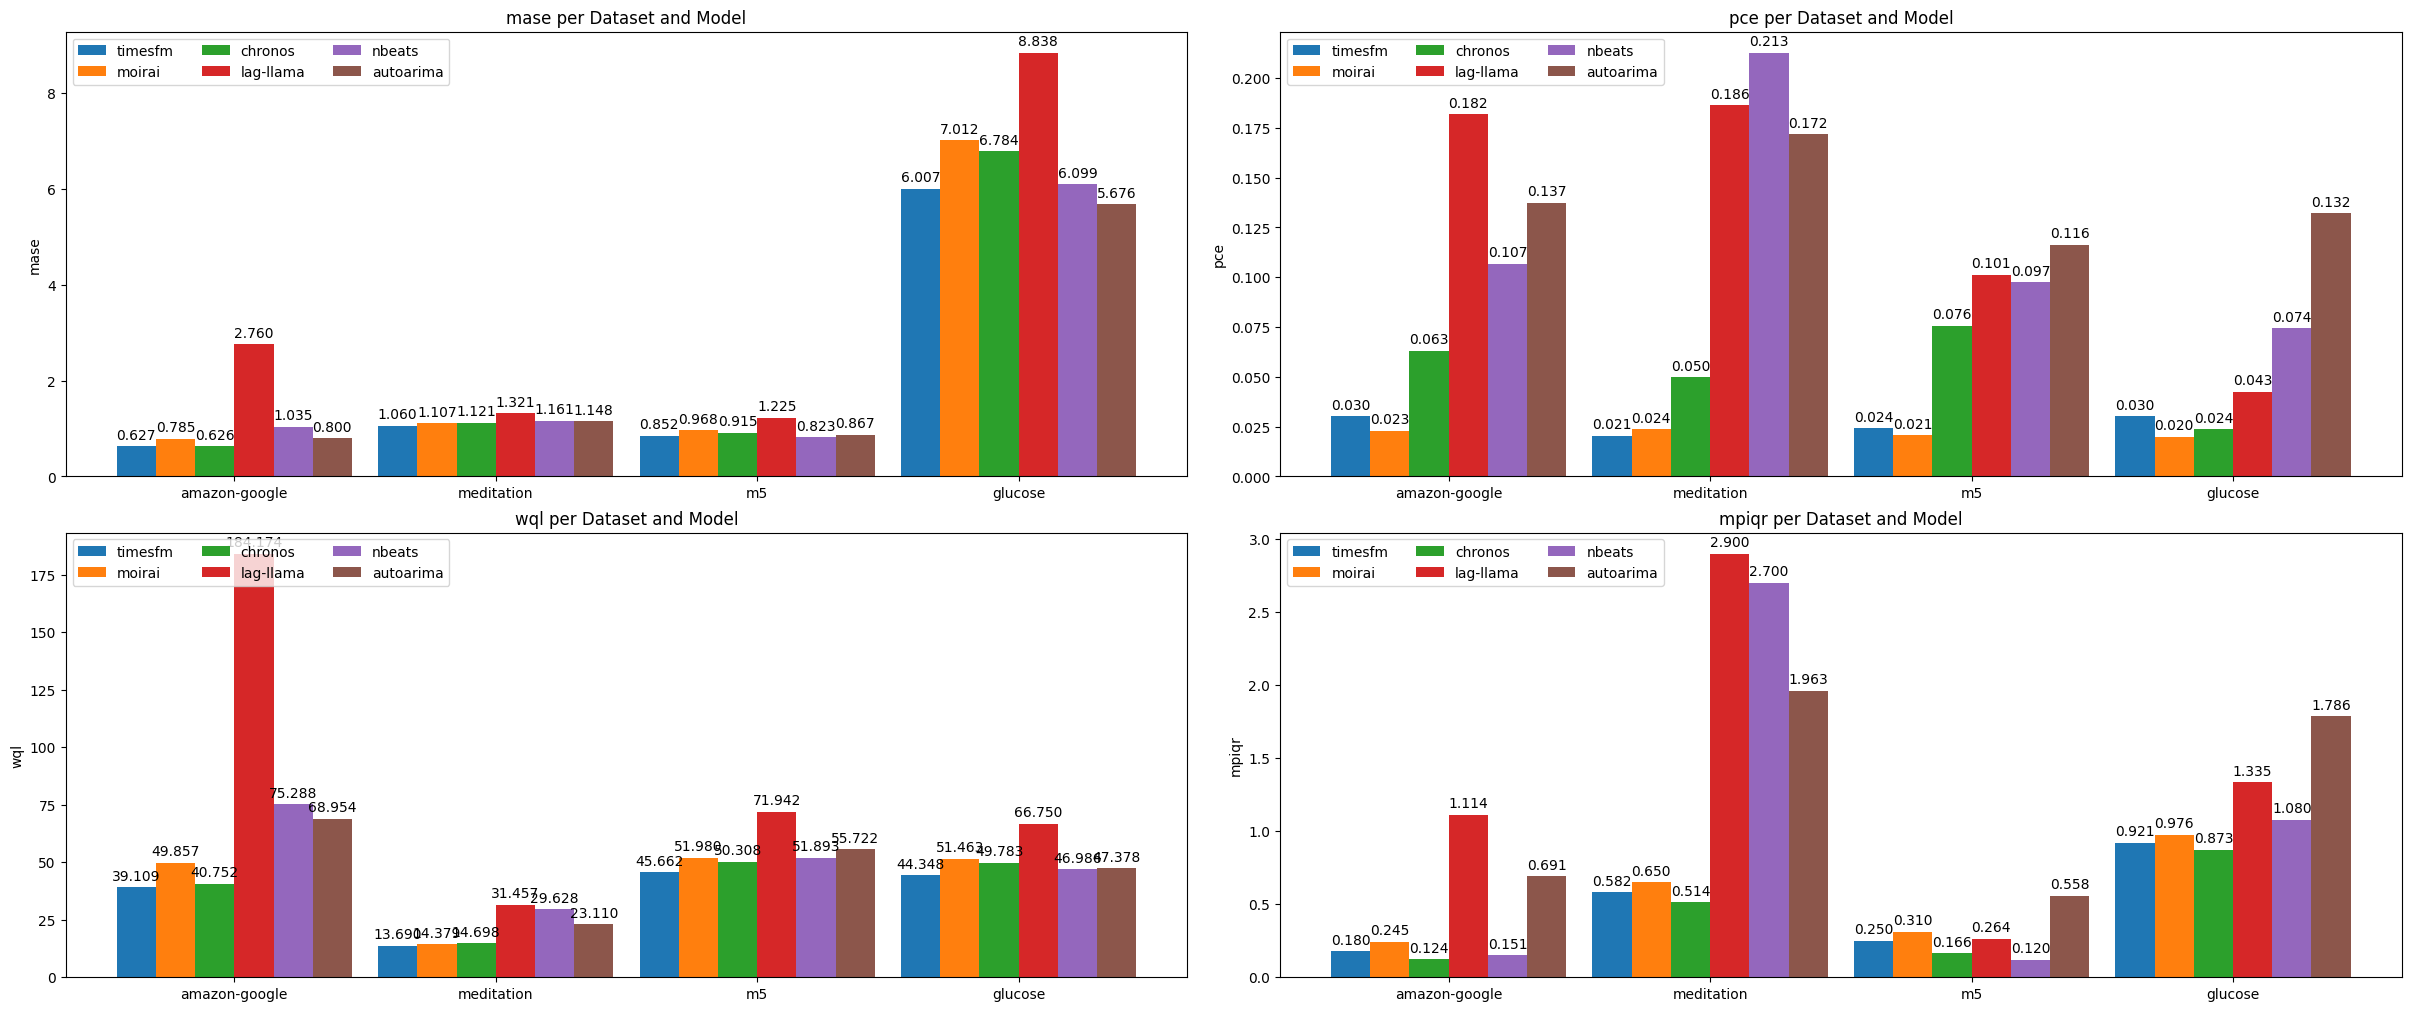

In [52]:
# Bar plot of metrics on different datasets
fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(24,10))
width = 0.15
x = np.arange(len(datasets))
wql_top = 0.03

for i, metric in enumerate(metrics):
    ax = axes[i%2, i//2]
    multiplier = 0
    for model in models:
        values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
        offset = width * multiplier - width*(len(models)/2-1.5)
        rects = ax.bar(x + offset, values, width, label=model)
        ax.bar_label(rects, padding=3, fmt='%.3f')
        multiplier += 1

    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per Dataset and Model')
    ax.set_xticks(x + width, datasets)
    ax.legend(loc='upper left', ncols=3)
plt.savefig('figures/bar_plot_all_metrics_per_dataset_model.png')
plt.show()


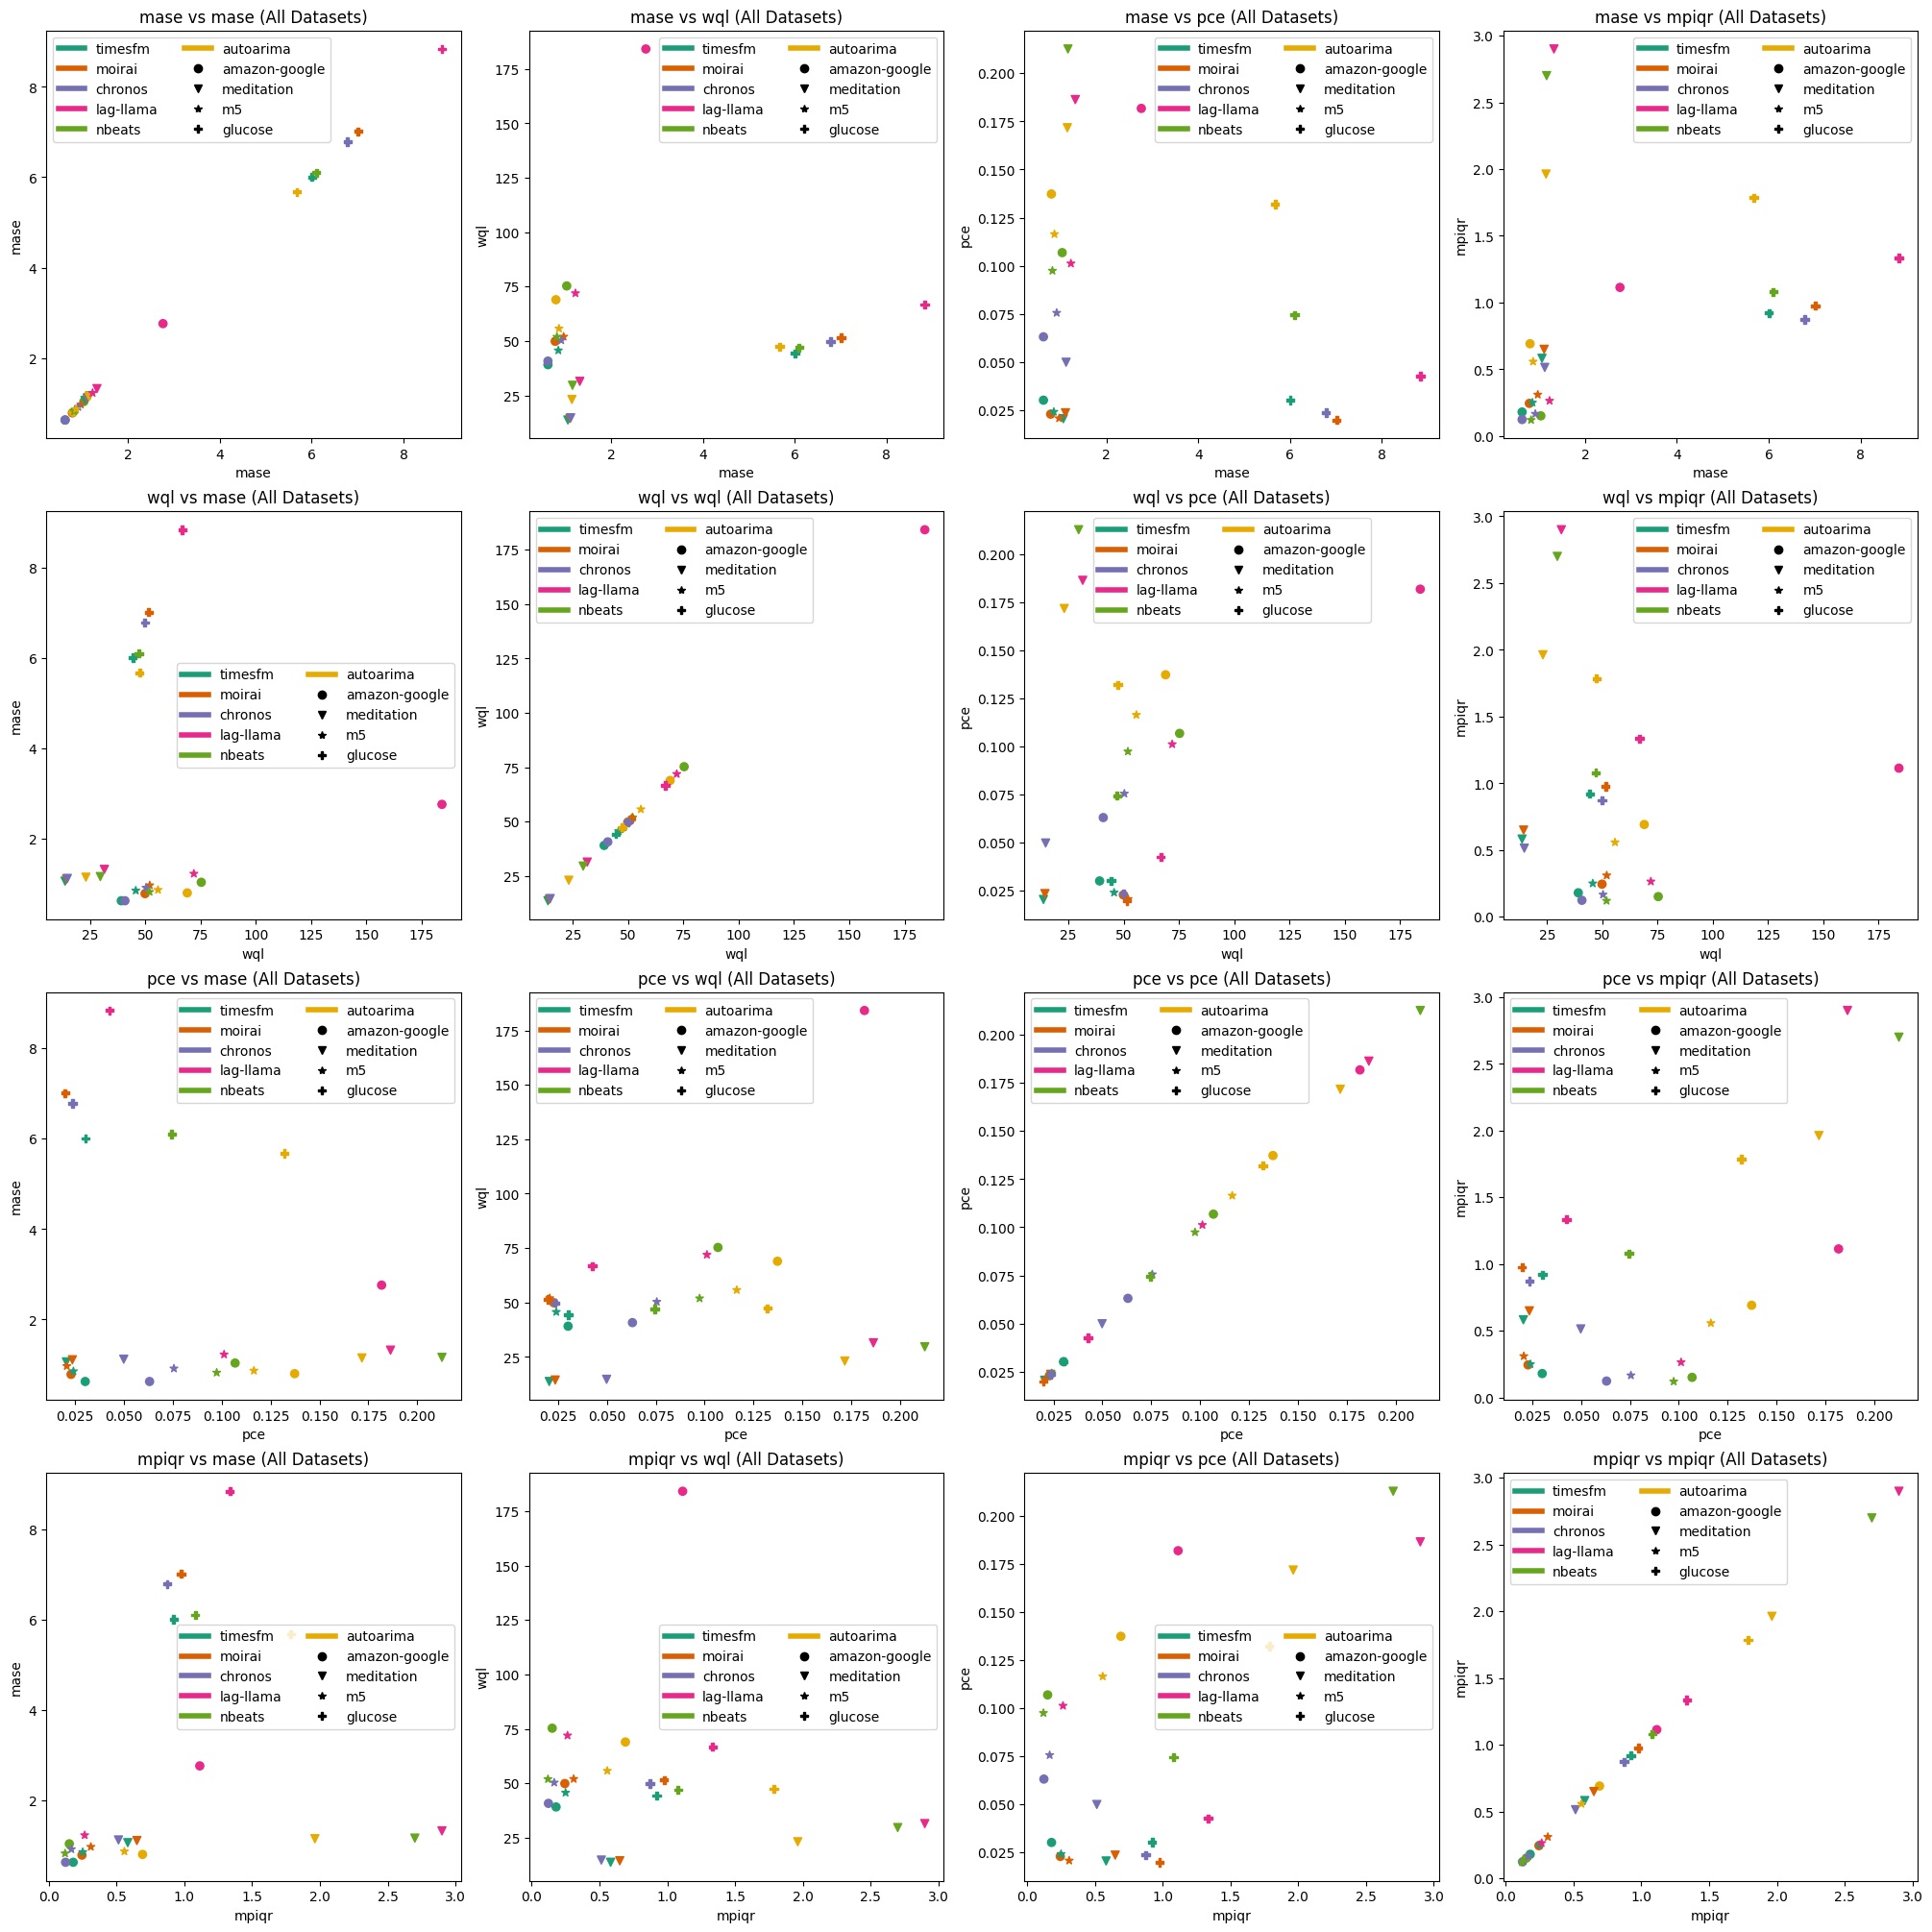

In [53]:
# Metric comparison scatter plots (all datasets)
fig, axes = plt.subplots(4, 4, layout='constrained', figsize=(20,20))
wql_top = 0.03

custom_legend_dots = []
for model, model_color in zip(models, model_colors):
    custom_legend_dots.append(Line2D([0], [0], color=model_color, lw=4, label=model))
for dataset, marker in zip(datasets, dataset_markers):
    custom_legend_dots.append(Line2D([0], [0], color='black', marker=marker, markersize=6, lw=0))


for i, metric_x in enumerate(metrics):
    for j, metric_y in enumerate(metrics):
        ax = axes[i, j]
        for marker, dataset in zip(dataset_markers, datasets):
            x = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_x), 'avg_result'].item() for model in models]
            y = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_y), 'avg_result'].item() for model in models]
            ax.scatter(x, y, c=model_colors, marker=marker)

        ax.set_ylabel(metric_y)
        ax.set_xlabel(metric_x)
        ax.set_title(f'{metric_x} vs {metric_y} (All Datasets)')
        ax.legend(custom_legend_dots, [*models, *datasets], ncols=2)
plt.savefig('figures/scatter_plot_metrics_per_metric.png')
plt.show()
        

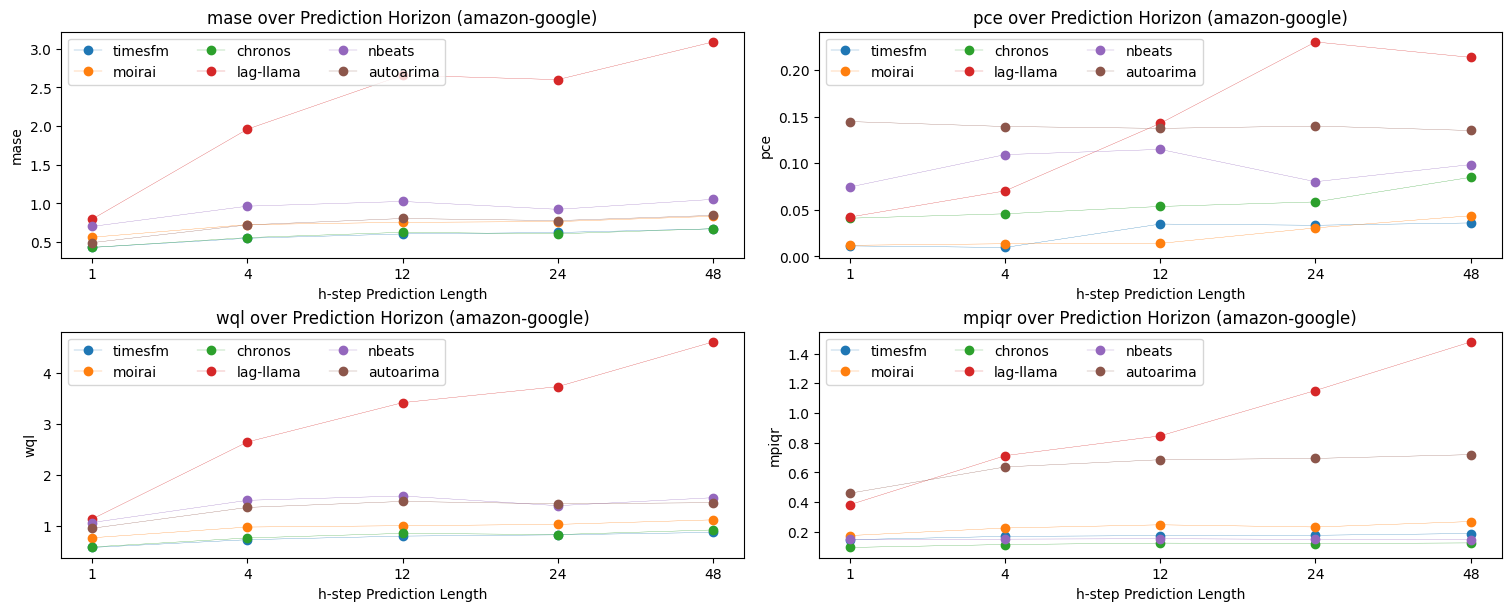

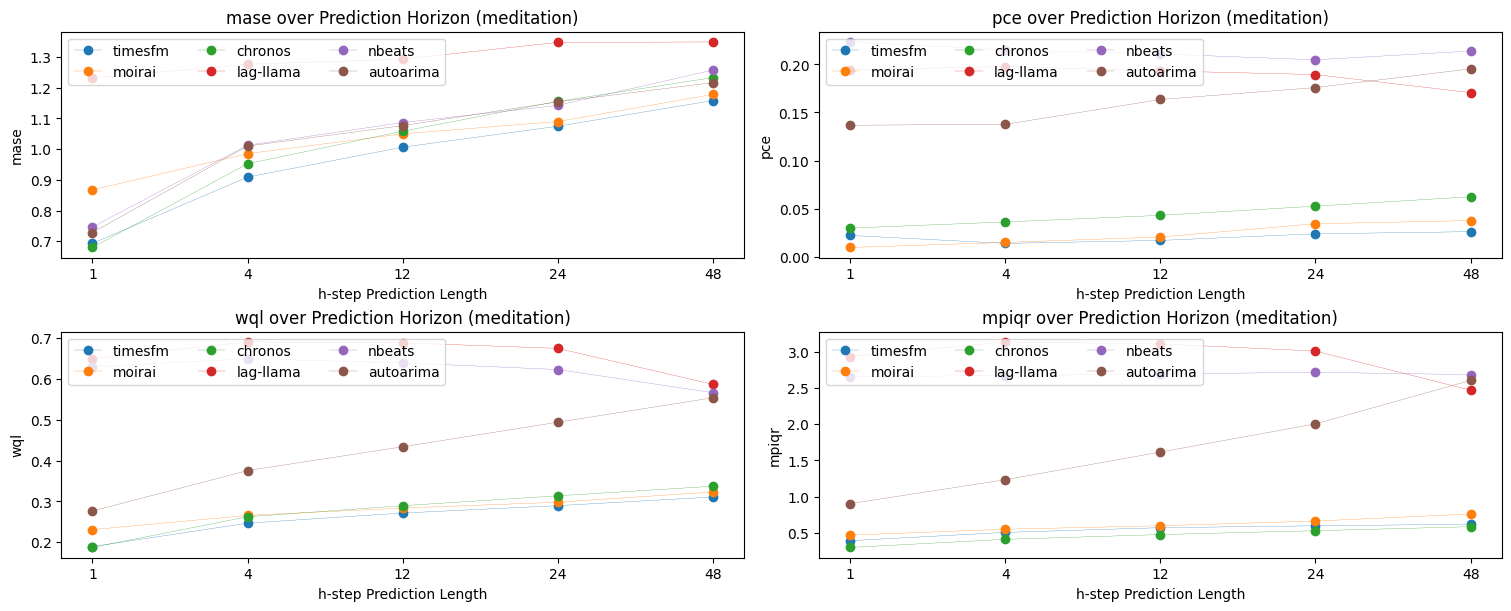

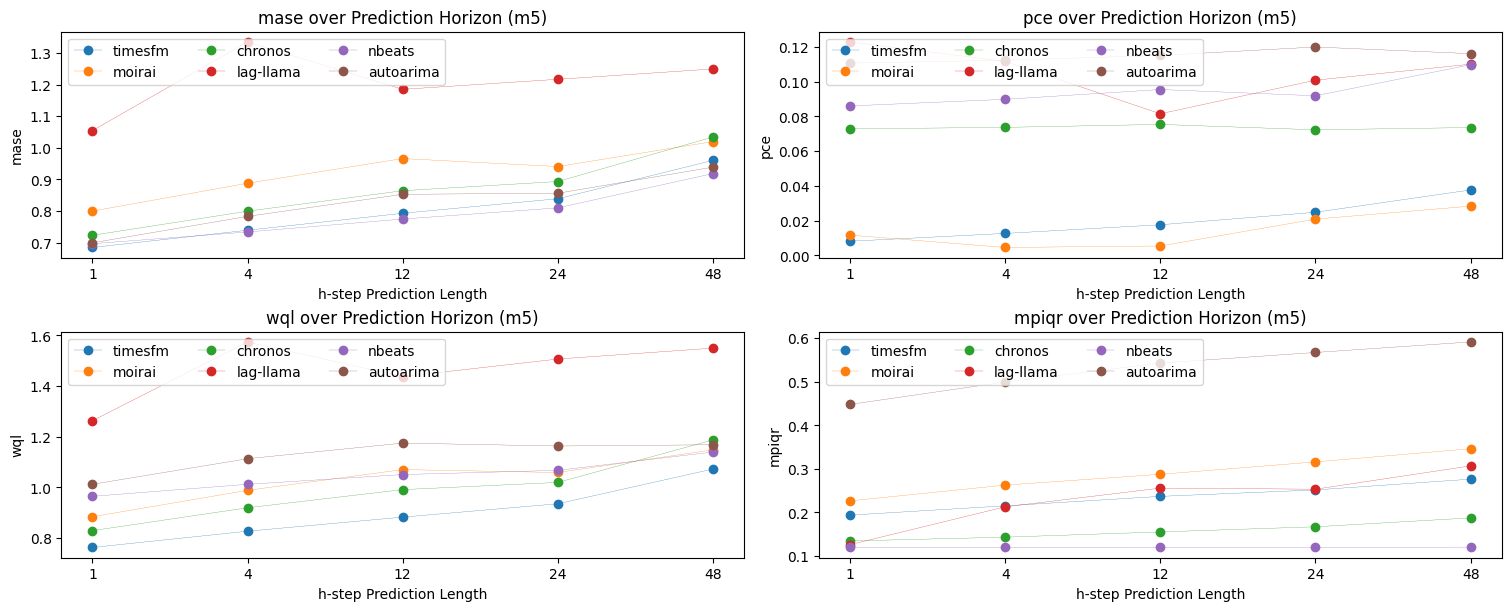

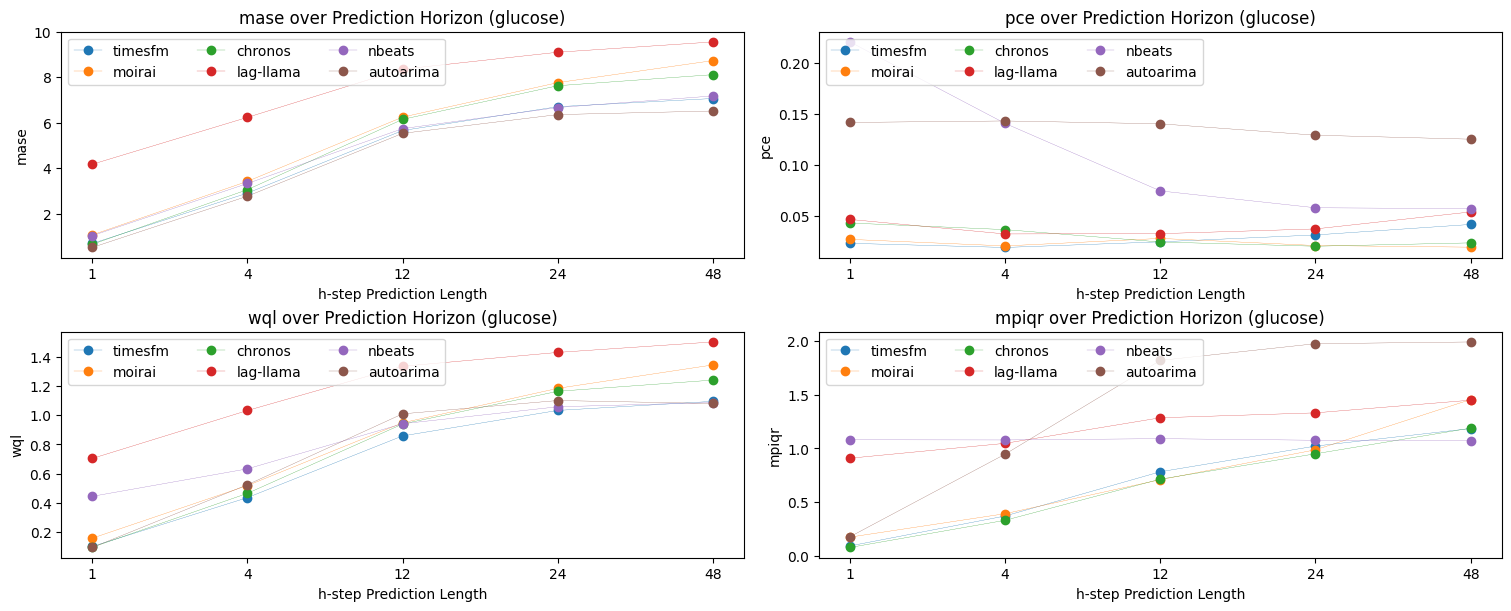

In [54]:
# Line Plot Metrics over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

for dataset in datasets:
    fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
    for i, metric in enumerate(metrics):
        ax = axes[i%2, i//2]
        for model in models:
            y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), pred_horizon].to_numpy().flatten()
            ax.plot(np.arange(len(pred_horizon)), y, label=model, marker='o', lw=0.2)

        # Add some text for labels, title and custom x-axis tick labels, etc.   
        ax.set_ylabel(metric)
        ax.set_xlabel("h-step Prediction Length")
        ax.set_title(f'{metric} over Prediction Horizon ({dataset})')
        ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
        ax.legend(loc='upper left', ncols=3)
    plt.savefig(f'figures/line_plot_all_metrics_per_pred_len_{dataset}.png')
    plt.show()

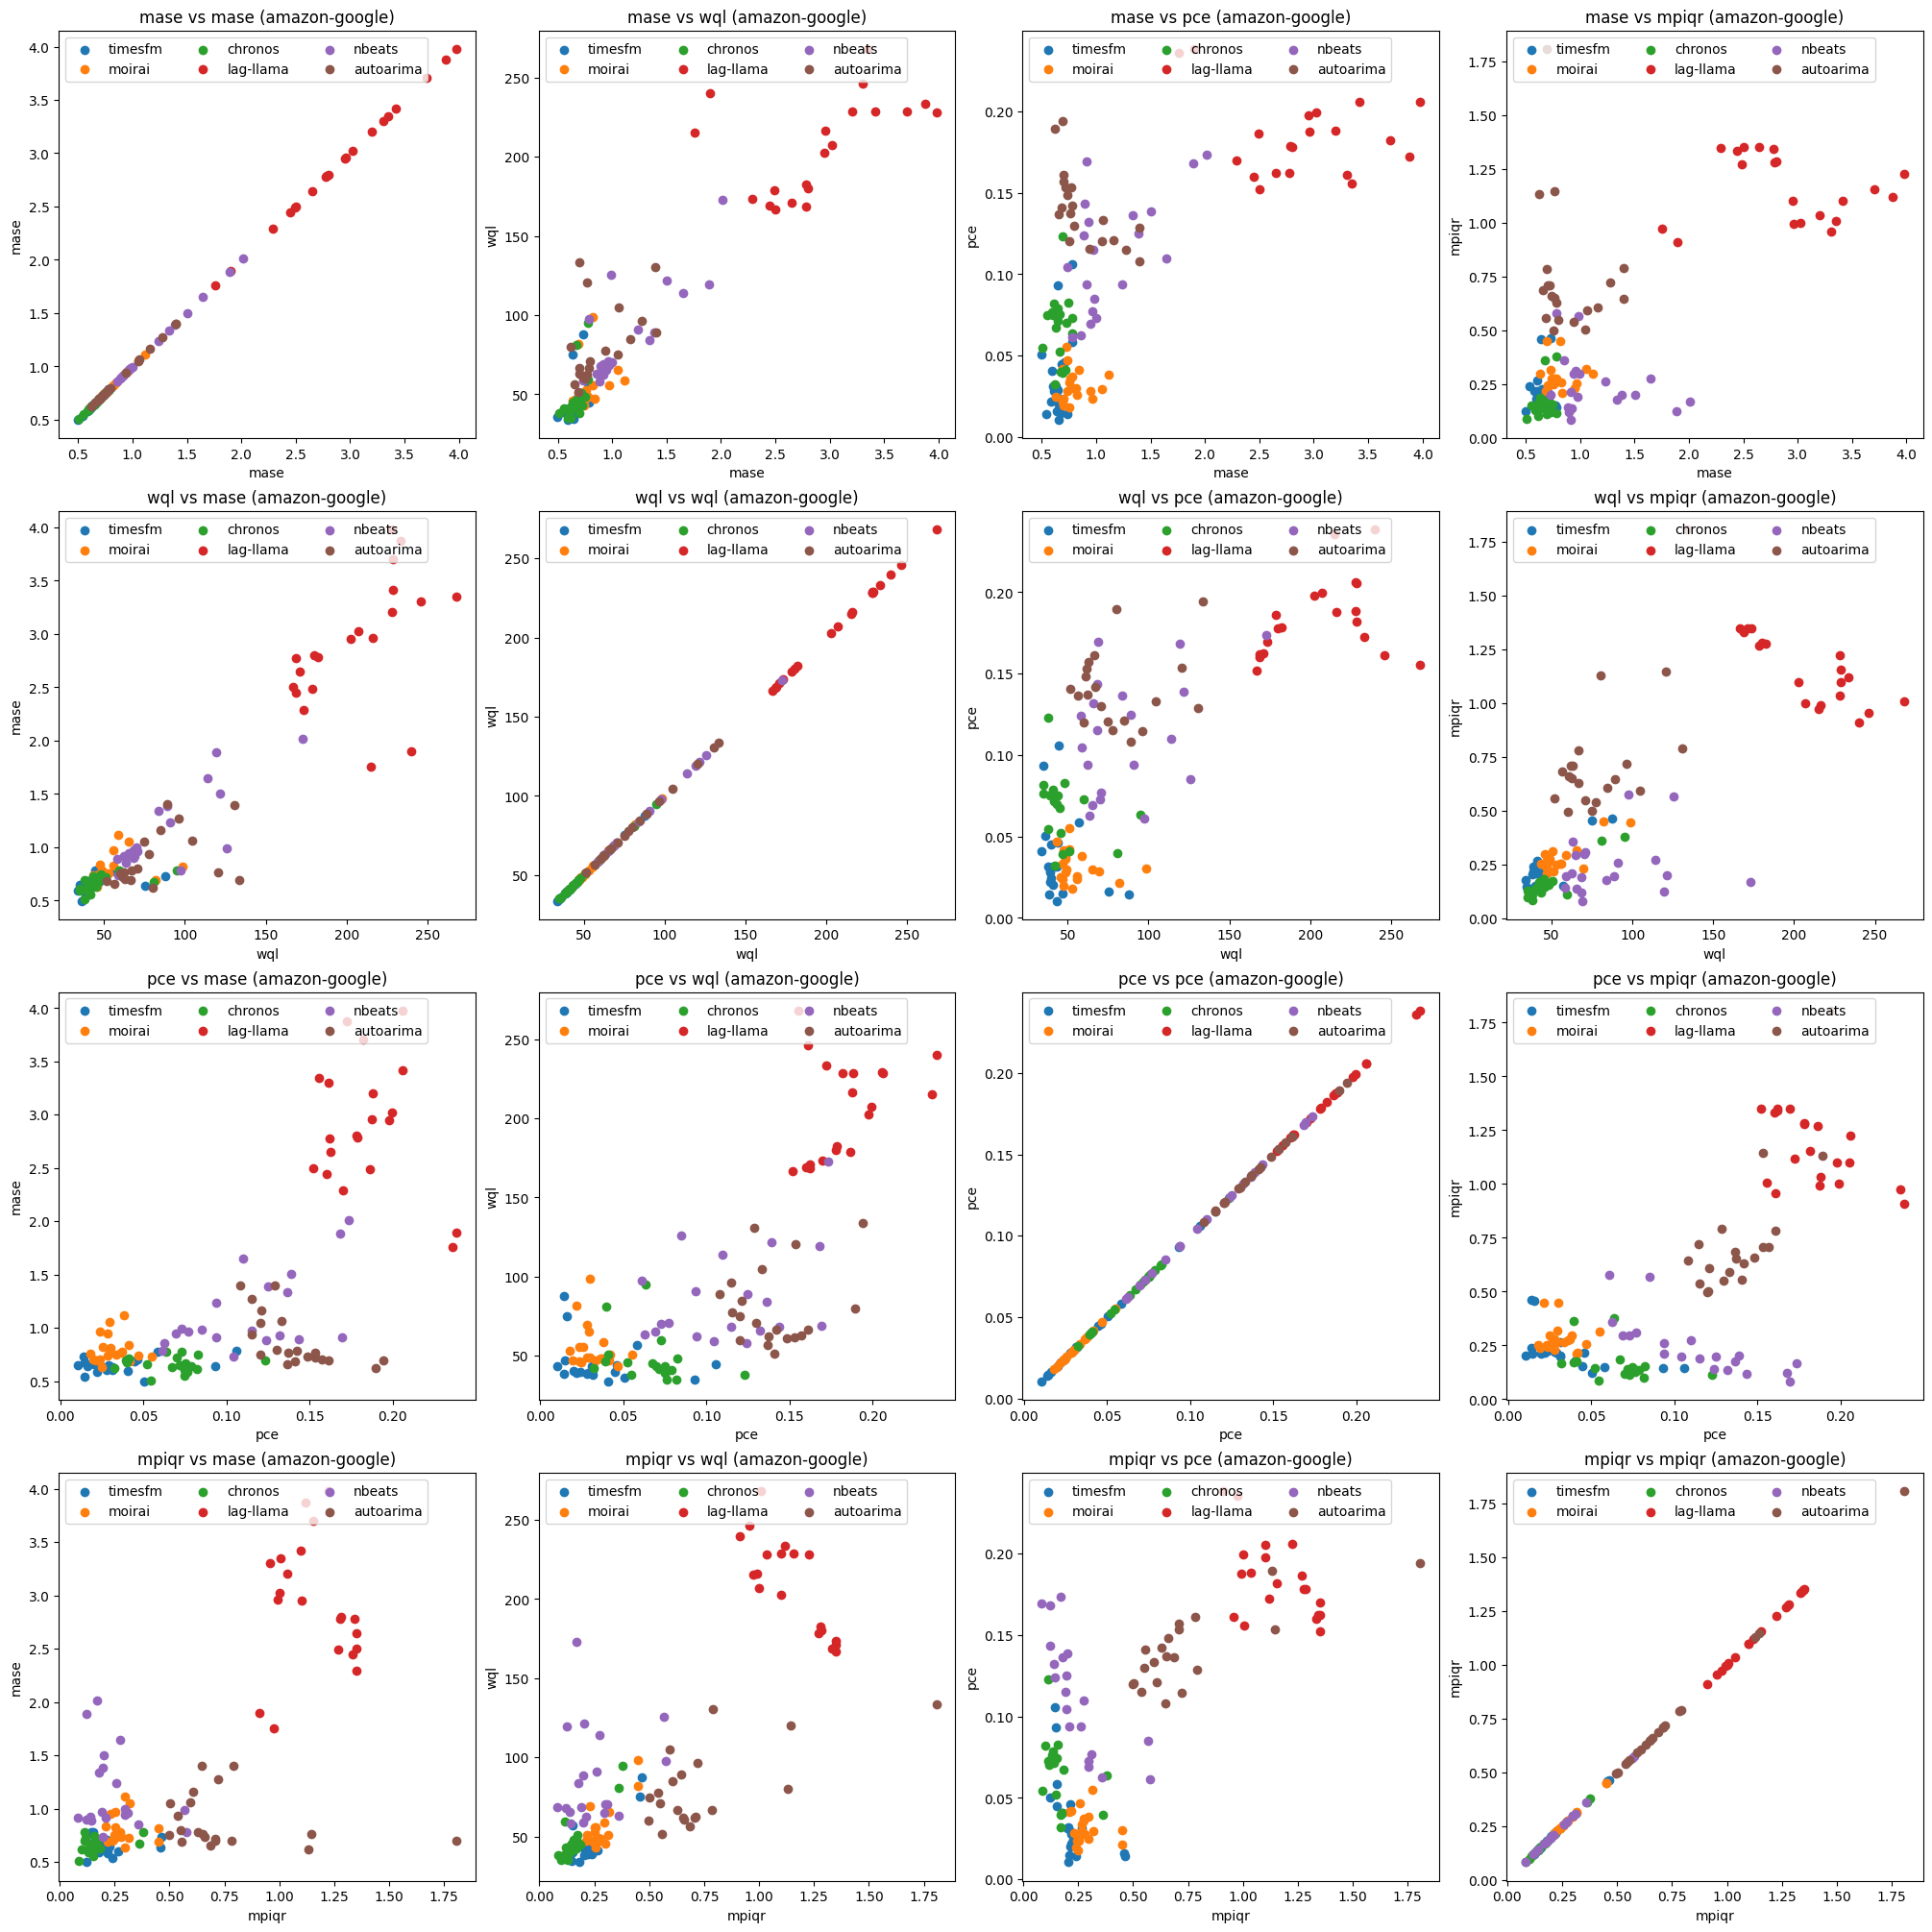

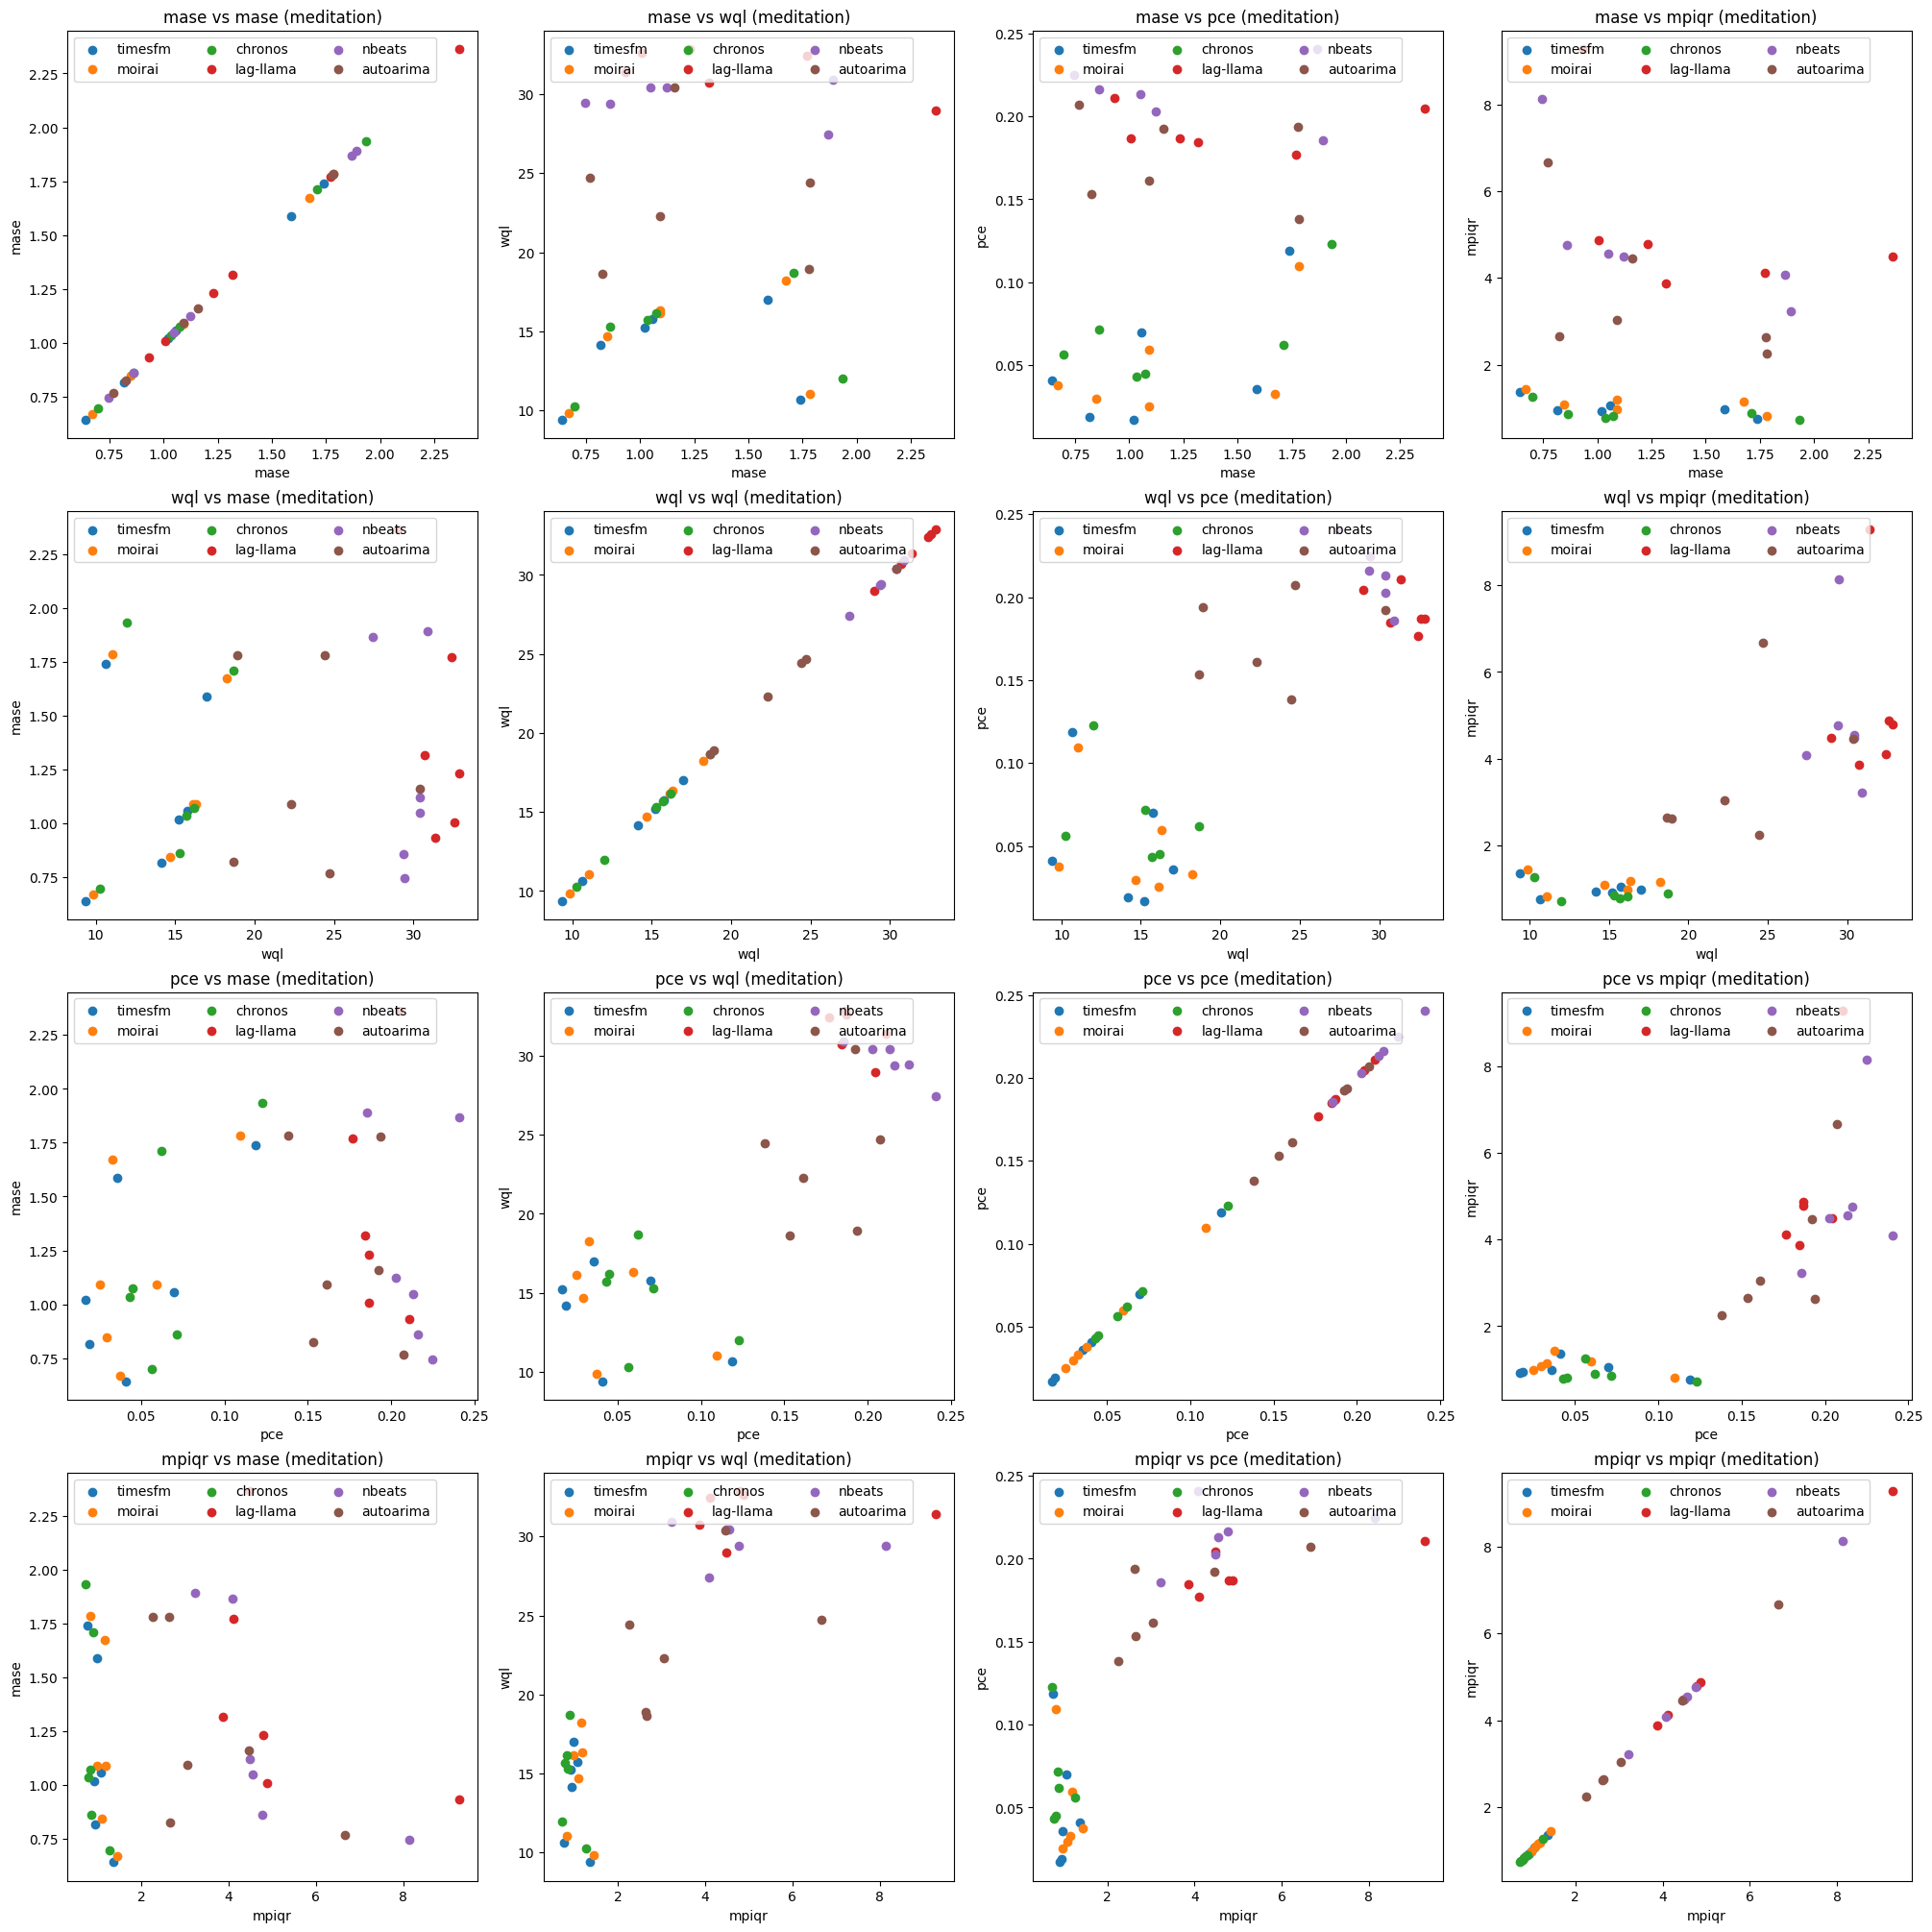

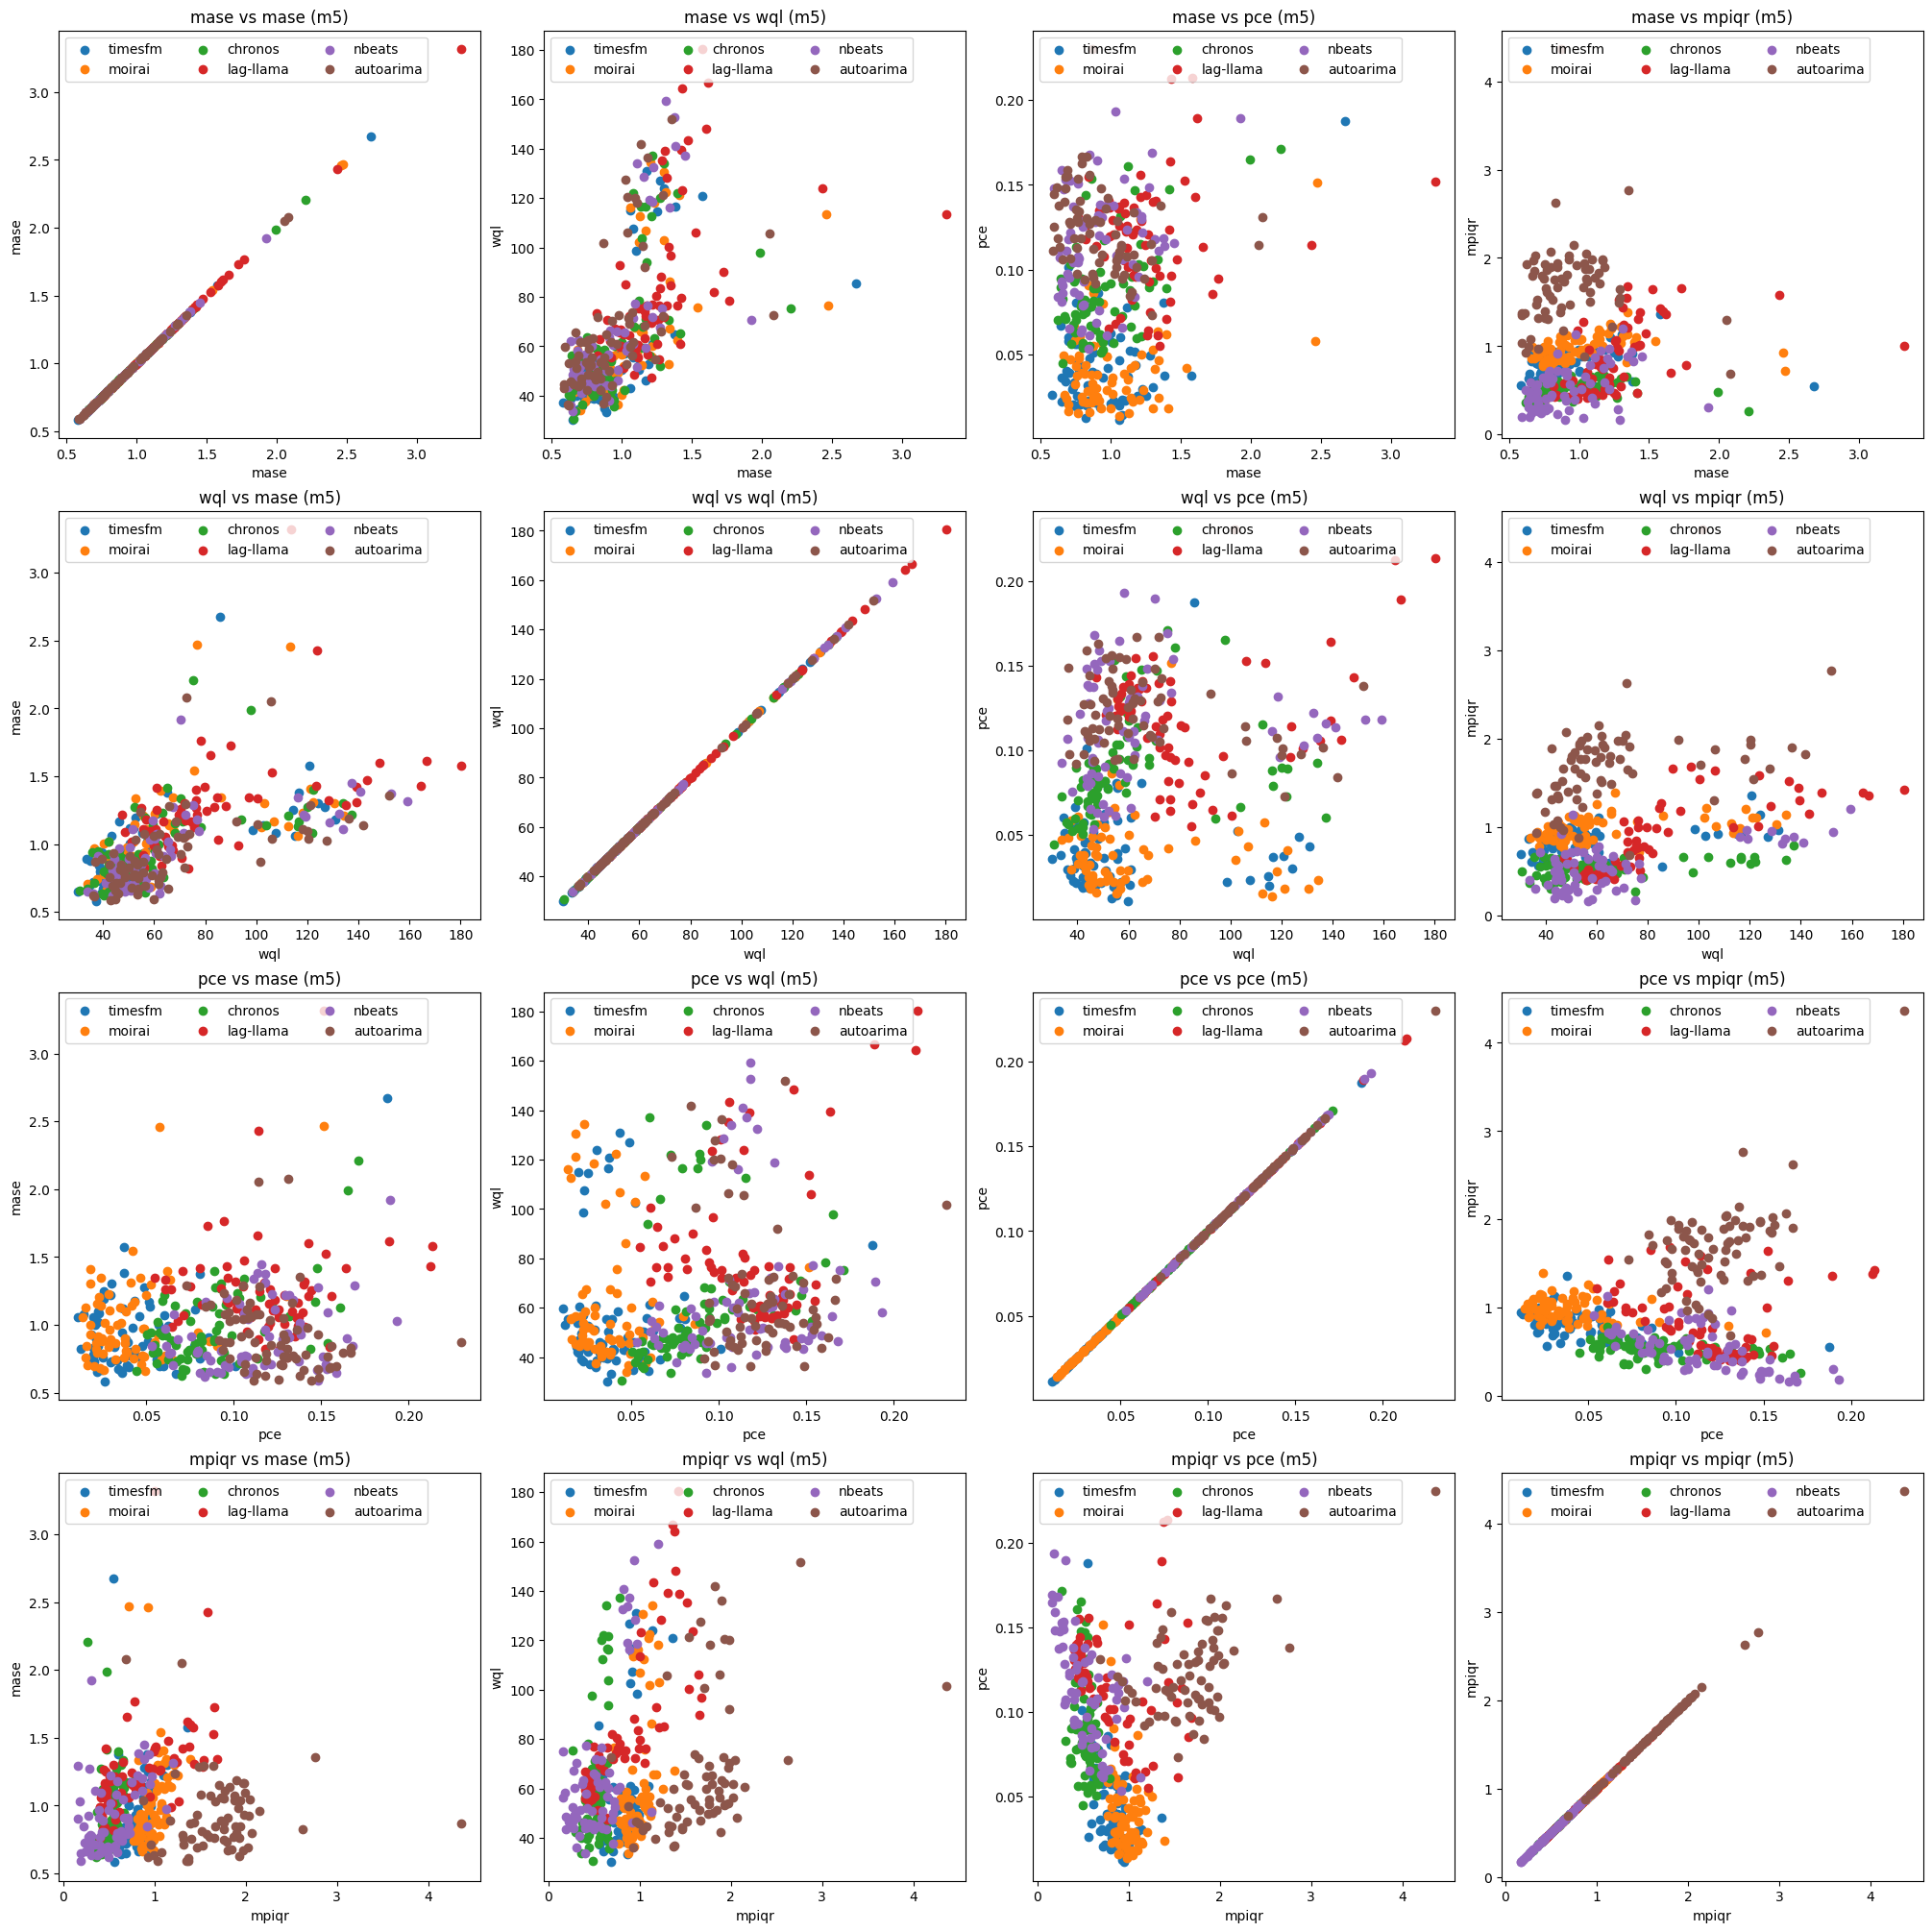

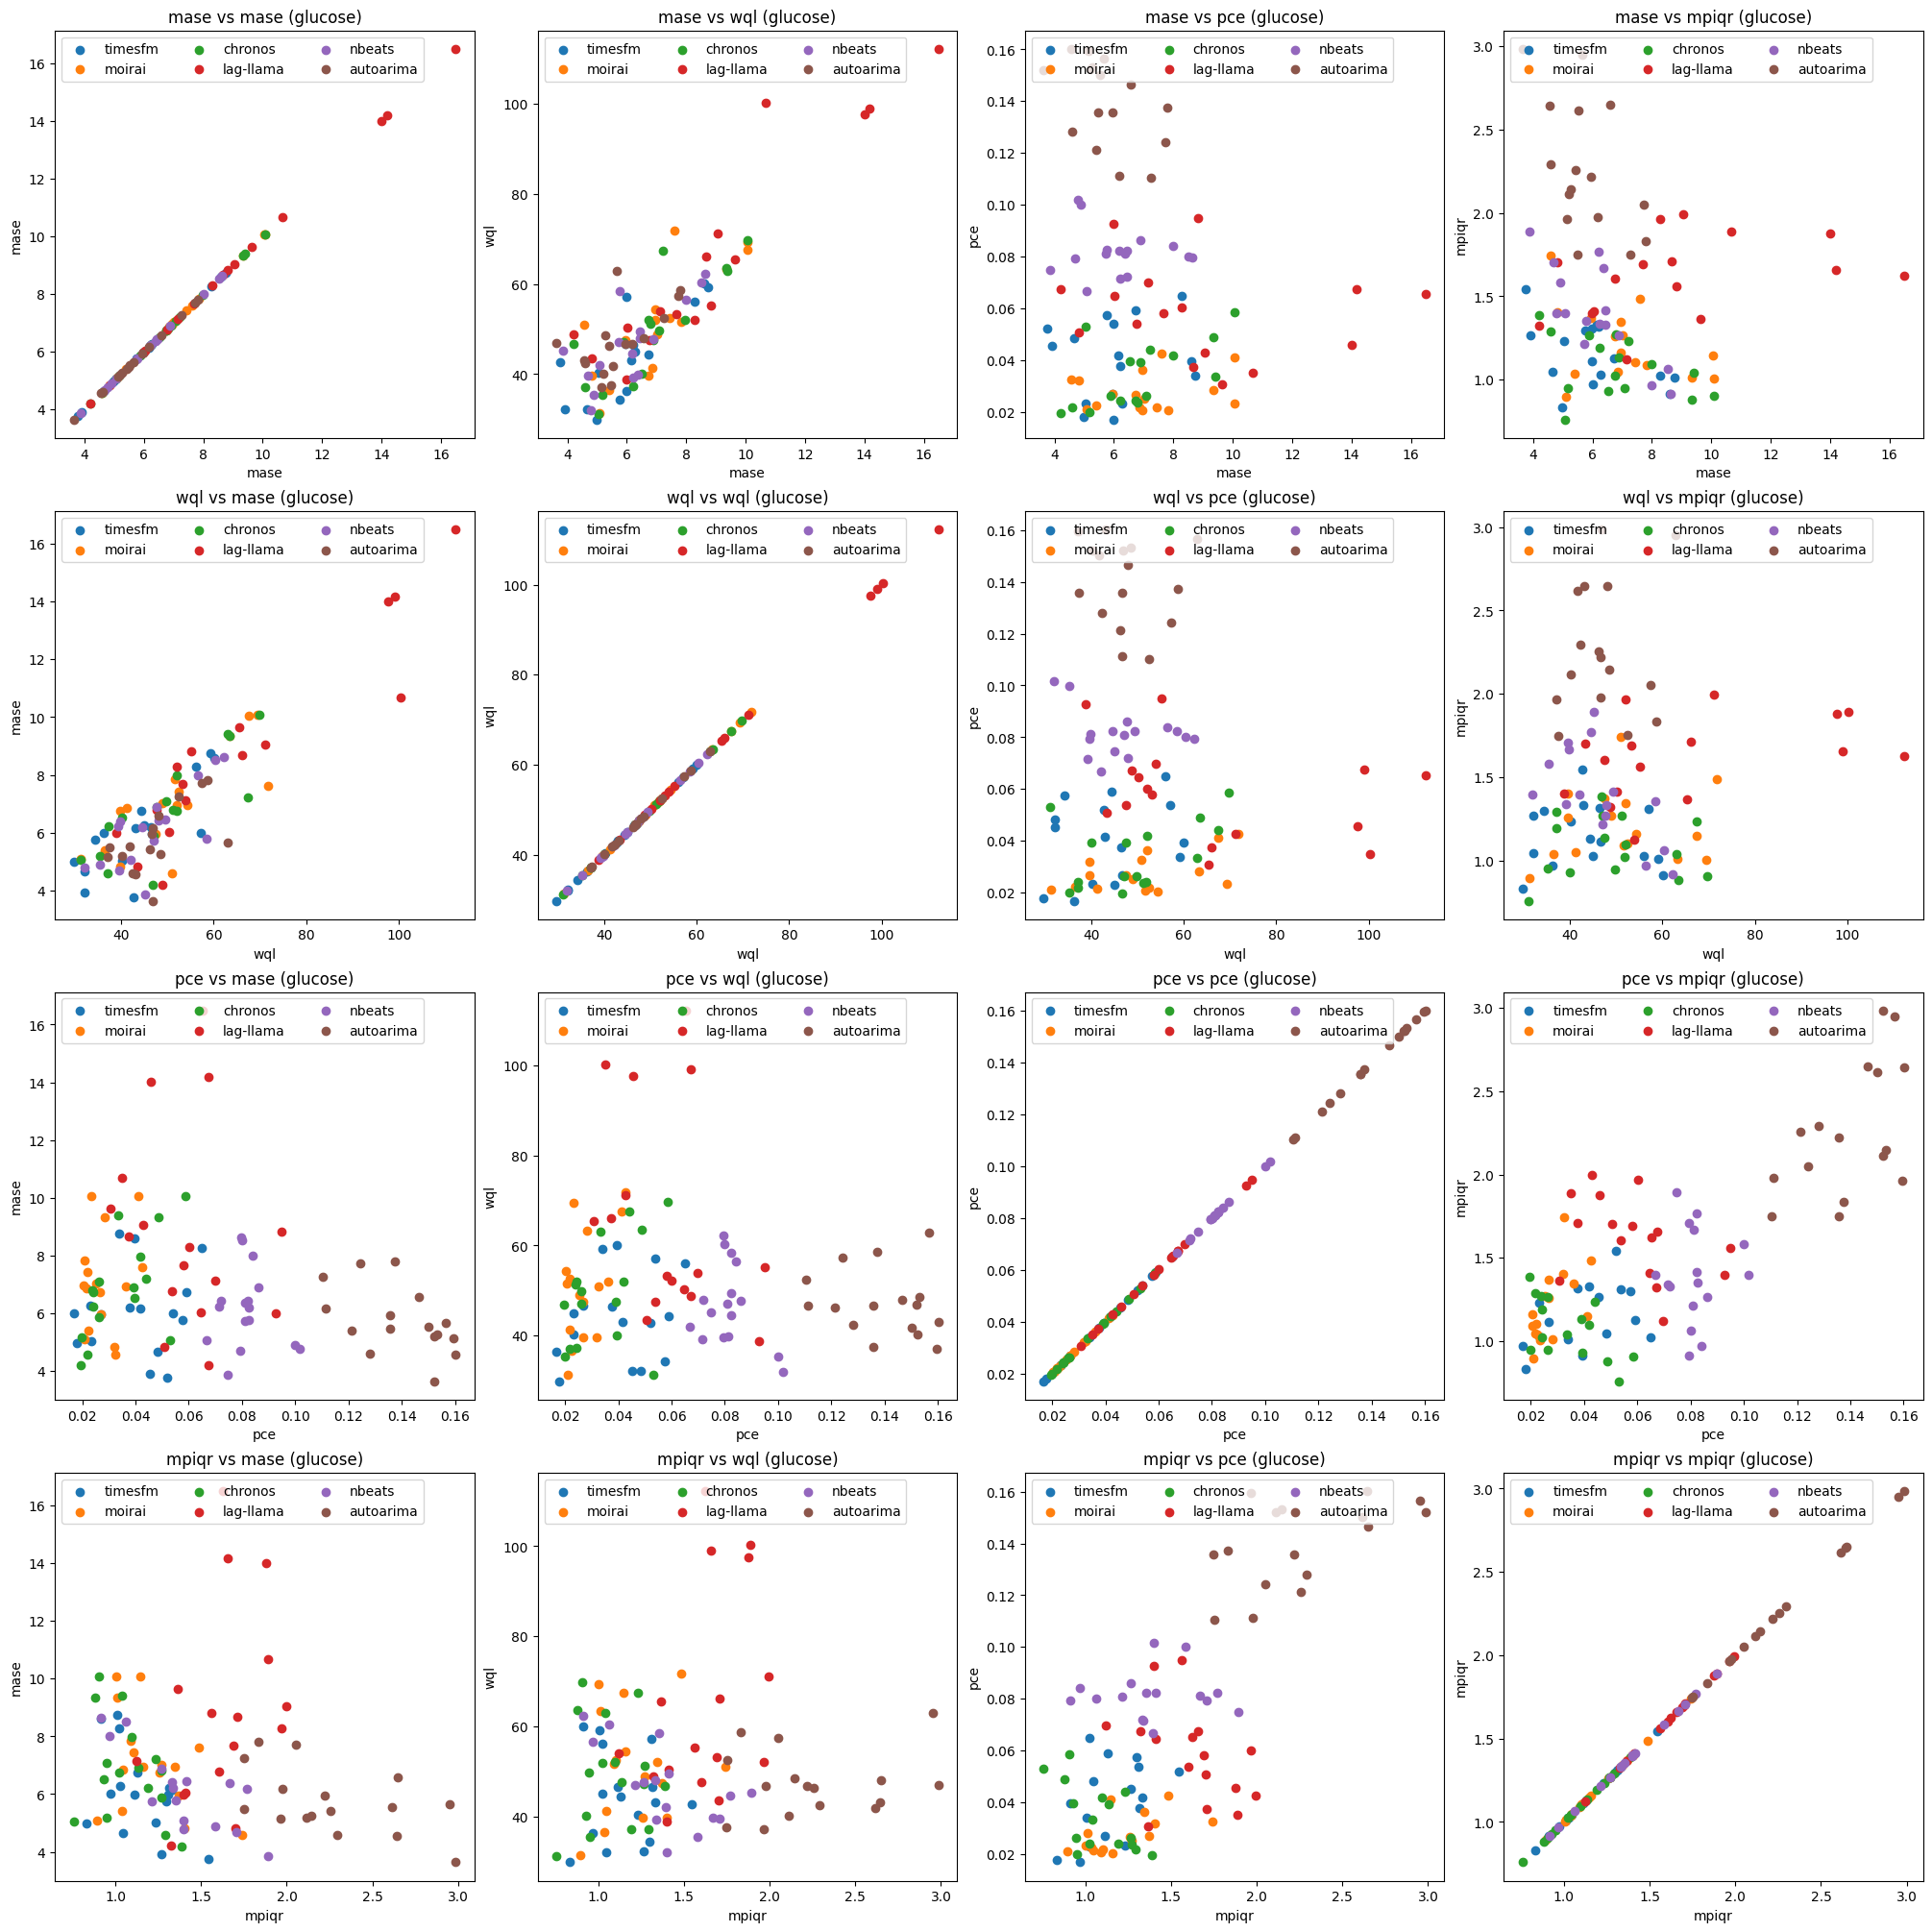

In [55]:
# Metric comparison scatter plots (individual timeseries)
for dataset in datasets:
    fig, axes = plt.subplots(4, 4, layout='constrained', figsize=(20,20))

    for i, metric_x in enumerate(metrics):
        for j, metric_y in enumerate(metrics):
            ax = axes[i, j]
            for model in models:
                time_series_ind = [str(i) for i in range(1,num_timeseries[dataset]+1)]
                x = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']==metric_x), time_series_ind]
                y = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']==metric_y), time_series_ind]
                ax.scatter(x, y, label=model)

            ax.set_ylabel(metric_y)
            ax.set_xlabel(metric_x)
            ax.set_title(f'{metric_x} vs {metric_y} ({dataset})')
            ax.legend(loc='upper left', ncols=3)
    plt.savefig(f'figures/scatter_plot_all_metrics_per_metrics_timeseries_{dataset}.png')
    plt.show()

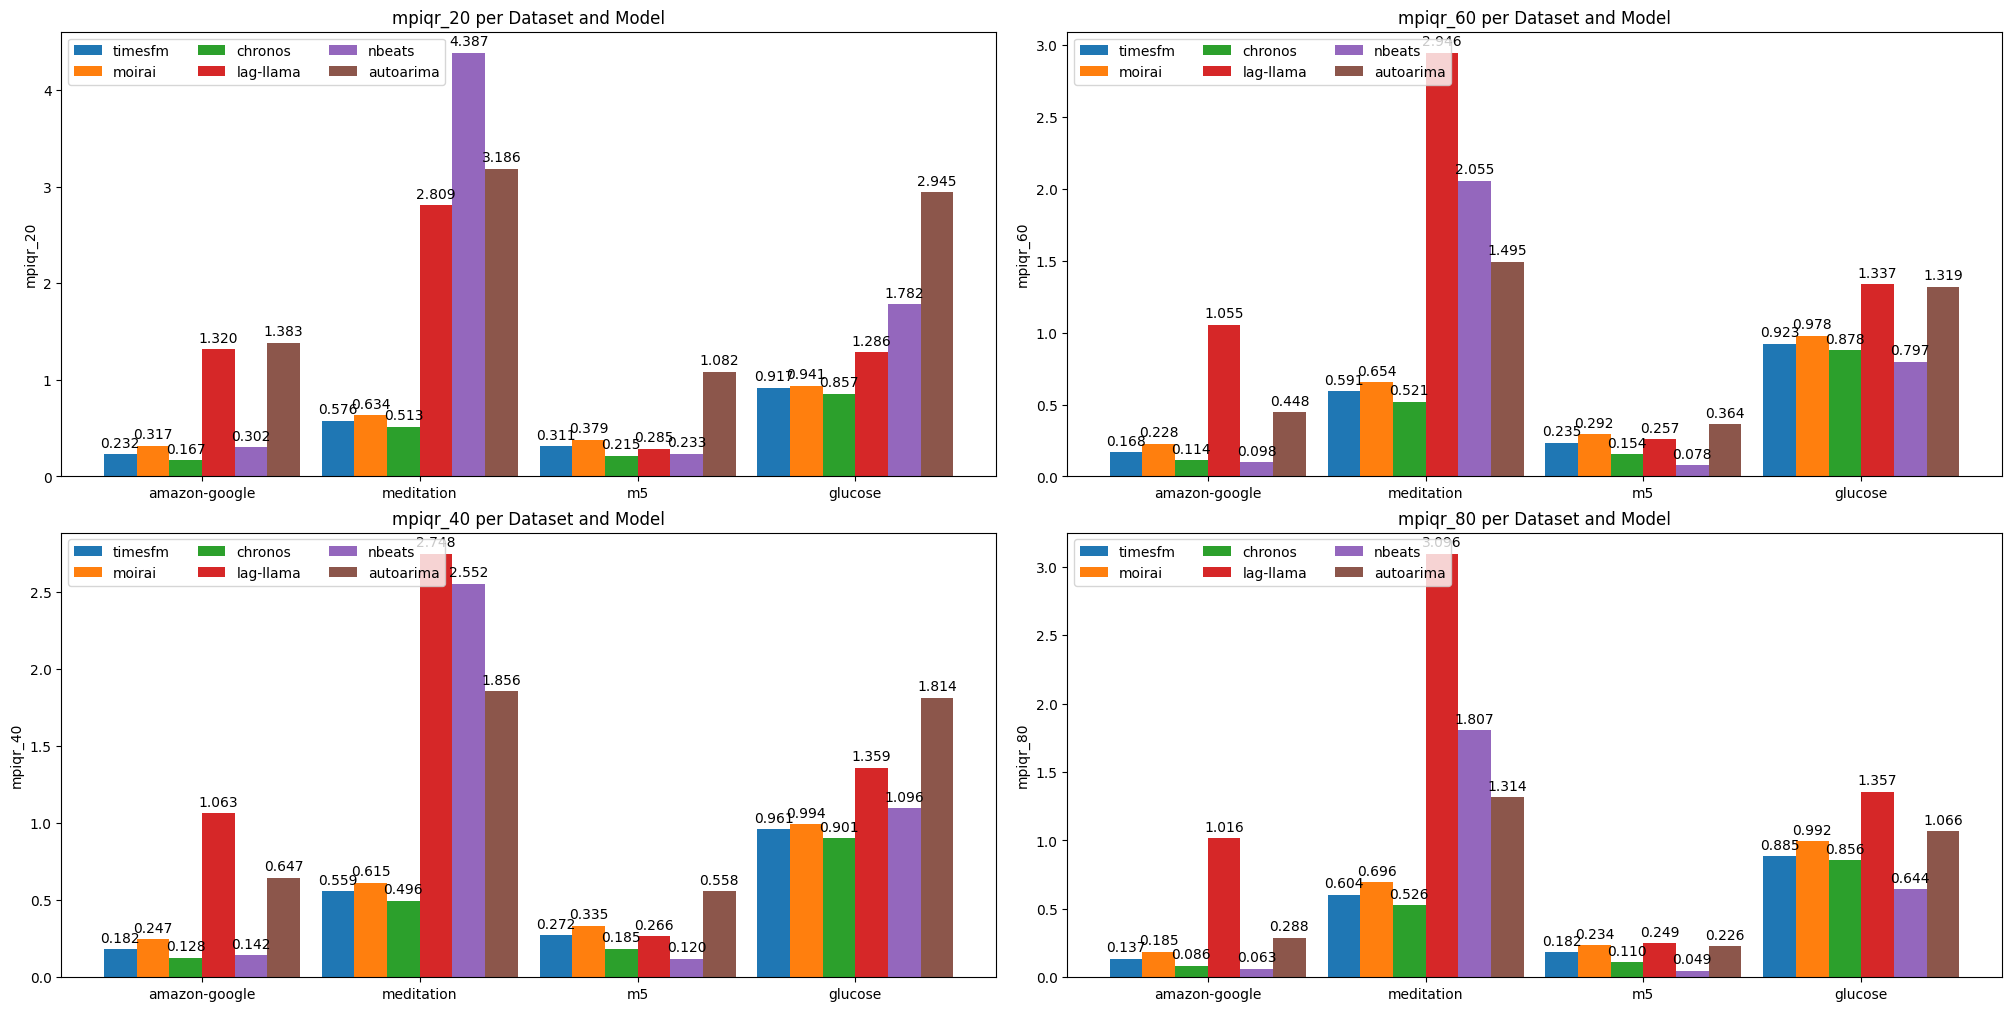

In [43]:
# Bar plot of mpiqr on different datasets
fig, axes = plt.subplots(2,2,layout='constrained', figsize=(20,10))
width = 0.15
x = np.arange(len(datasets))
wql_top = 0.03

for i, confidence in enumerate(confidences):
    metric = f'mpiqr_{confidence}'
    ax = axes[i%2, i//2]
    multiplier = 0
    for model in models:
        values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
        offset = width * multiplier - width*(len(models)/2-1.5)
        rects = ax.bar(x + offset, values, width, label=model)
        ax.bar_label(rects, padding=3, fmt='%.3f')
        multiplier += 1

    ax.set_ylabel(f"{metric}")
    ax.set_title(f'{metric} per Dataset and Model')
    ax.set_xticks(x + width, datasets)
    ax.legend(loc='upper left', ncols=3)
# plt.savefig('figures/bar_plot_mean_scaled_interval_size_per_dataset_model.png')
plt.show()

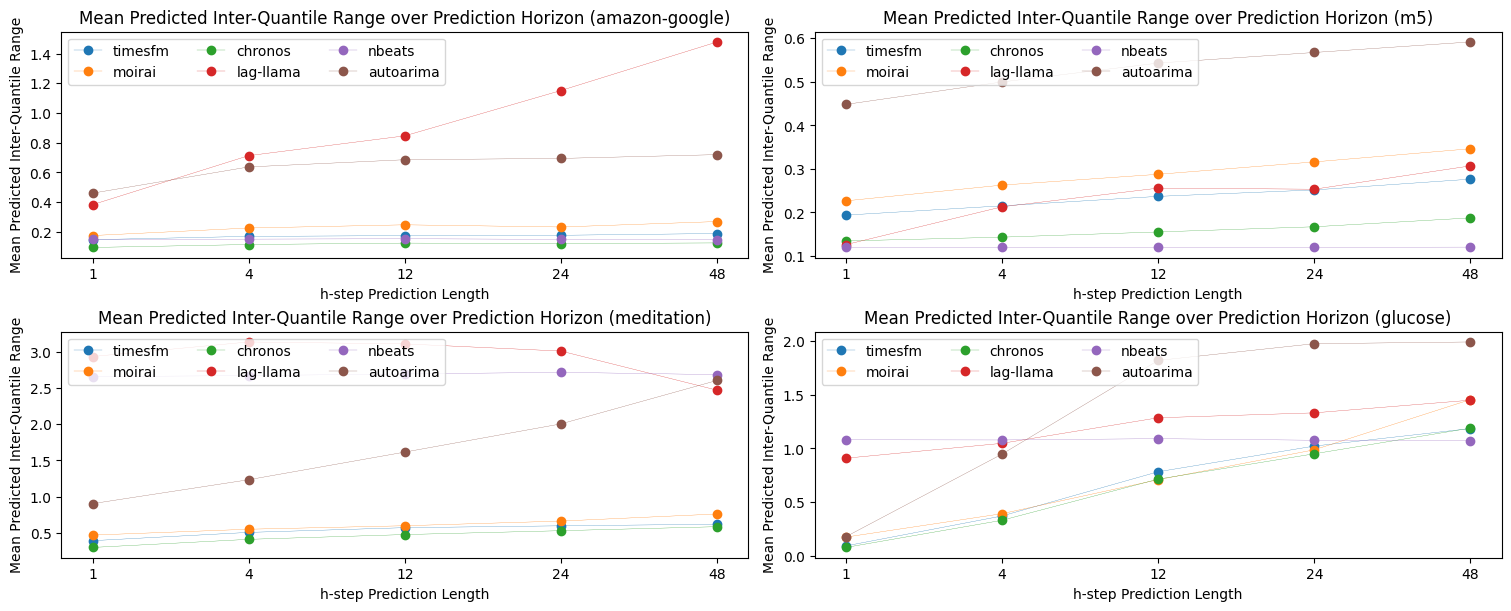

In [ ]:
# Line Plot Mean Predicted Inter-Quantile Range over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
for i, dataset in enumerate(datasets):
    ax = axes[i%2, i//2]
    for model in models:
        y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']=='mpiqr'), pred_horizon].to_numpy().flatten()
        ax.plot(np.arange(len(pred_horizon)), y, label=model, marker='o', lw=0.2)

    # Add some text for labels, title and custom x-axis tick labels, etc.   
    ax.set_ylabel("Mean Predicted Inter-Quantile Range")
    ax.set_xlabel("h-step Prediction Length")
    ax.set_title(f'Mean Predicted Inter-Quantile Range over Prediction Horizon ({dataset})')
    ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
    ax.legend(loc='upper left', ncols=3)
plt.savefig(f'figures/line_plot_mpiqr_per_pred_len.png')
plt.show()

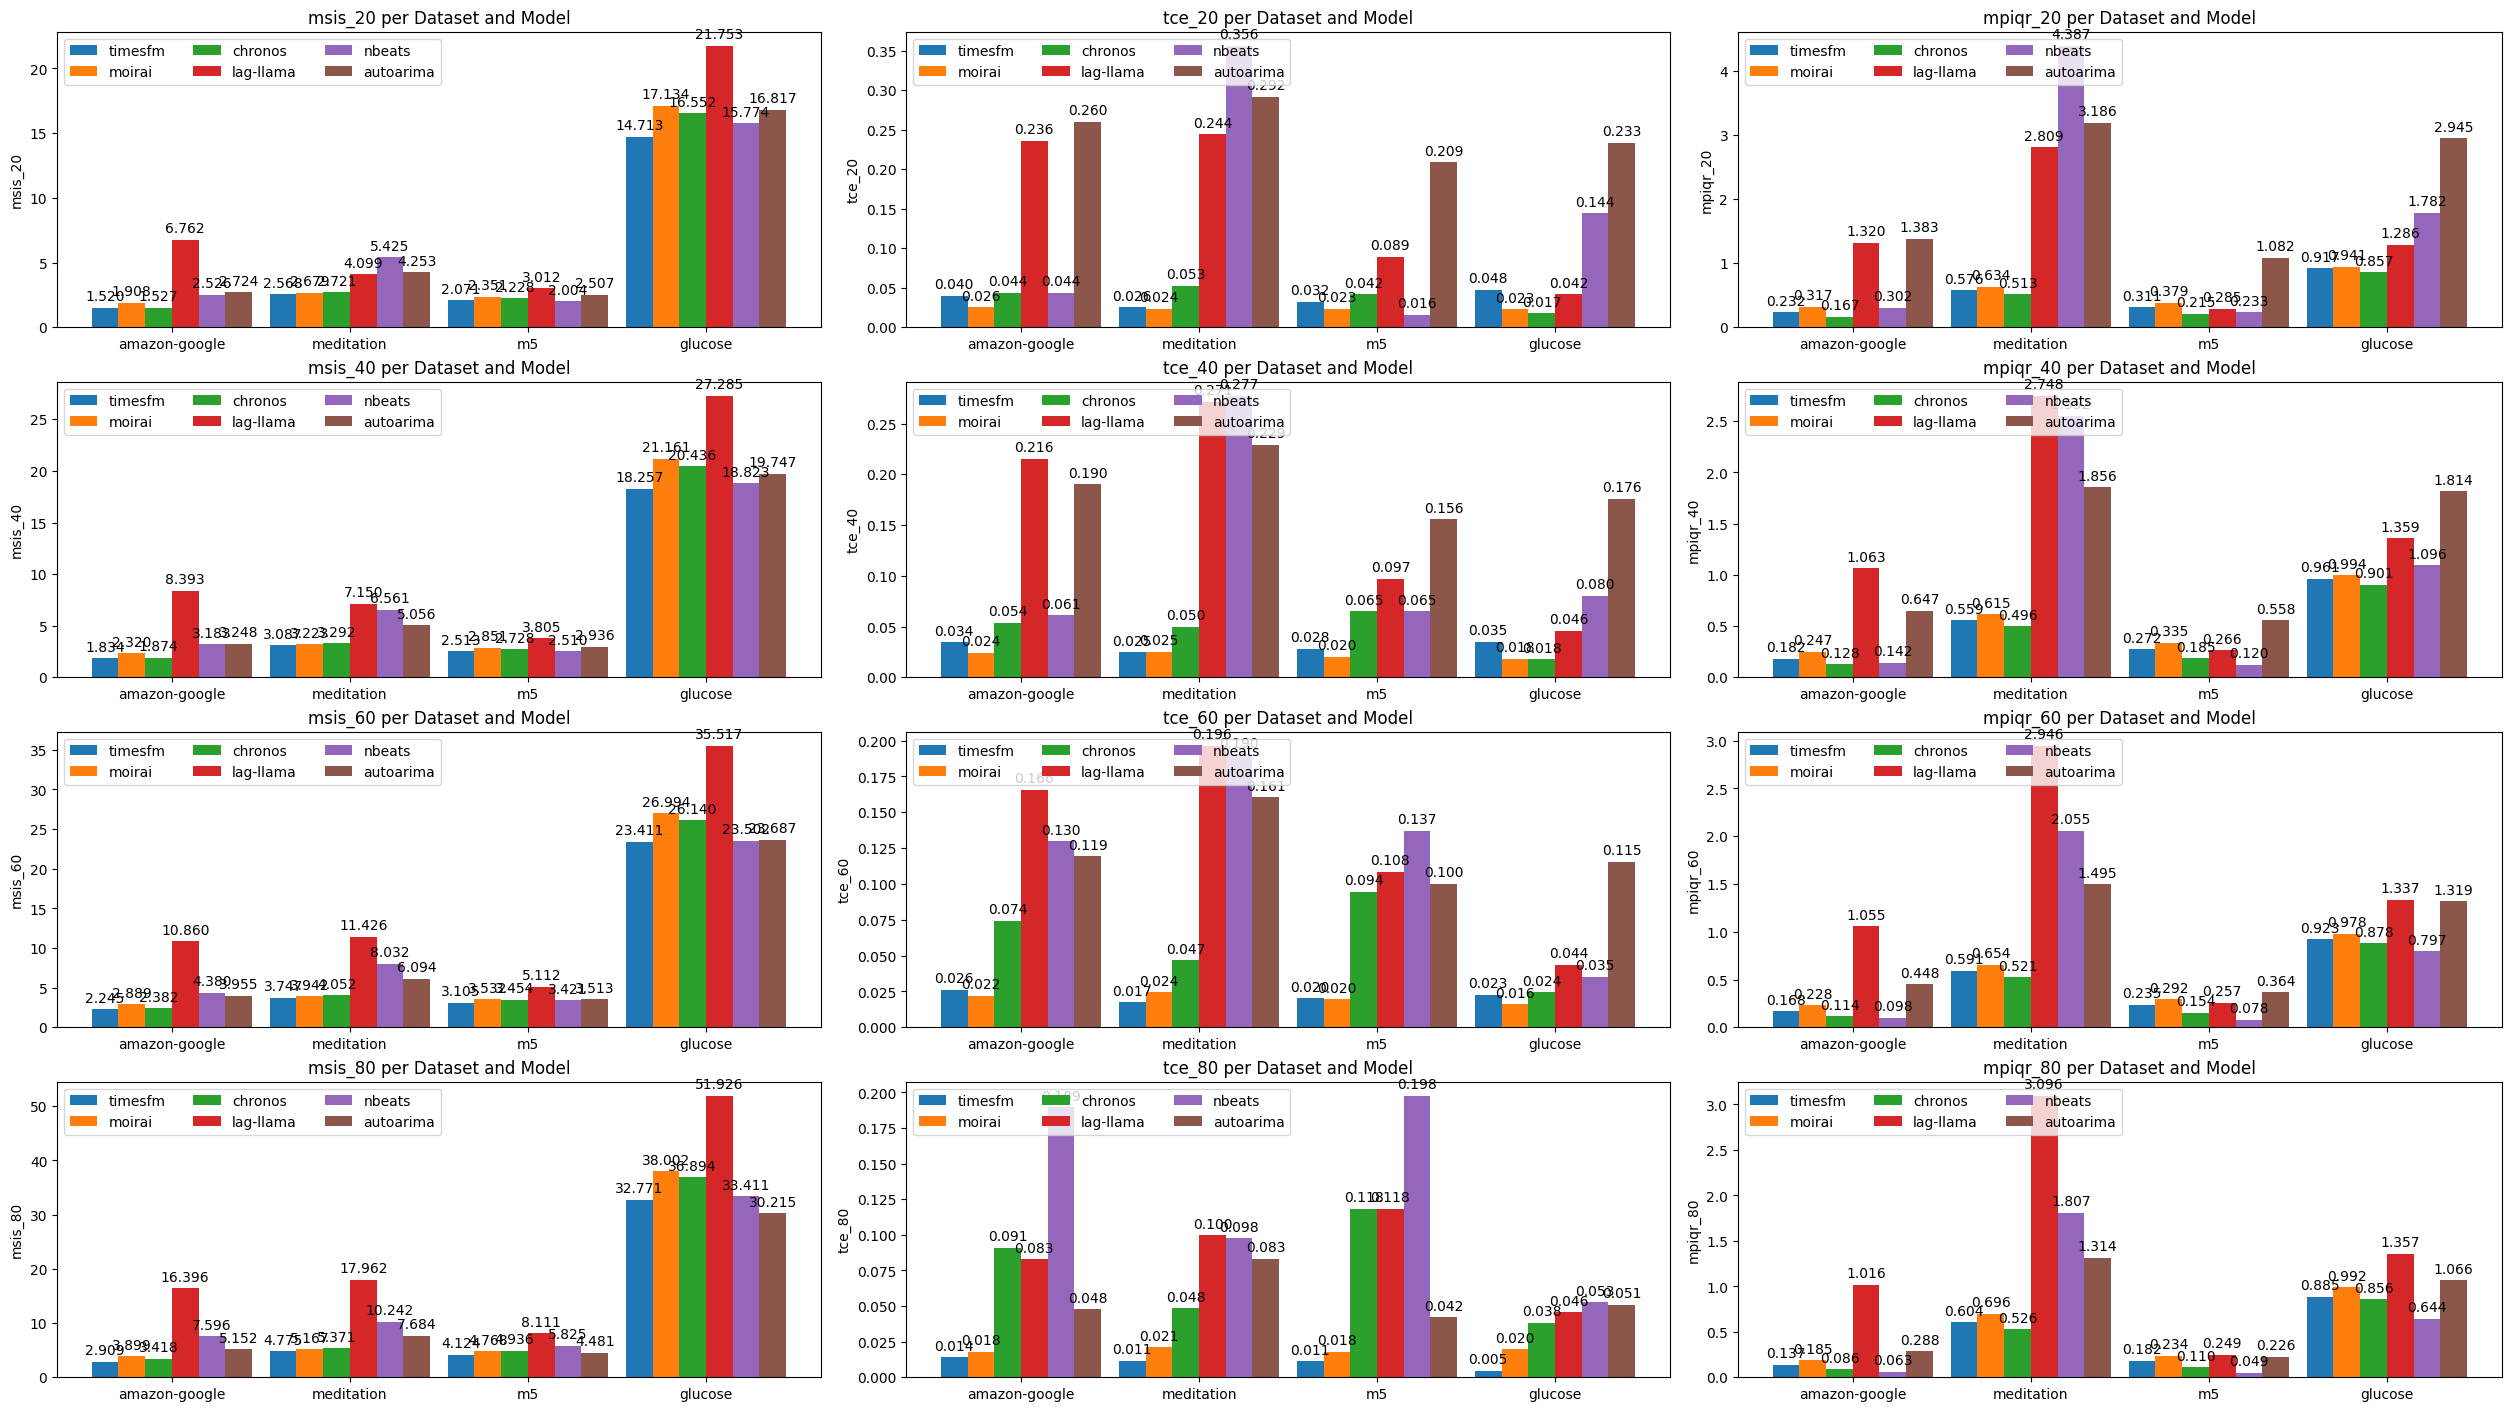

In [46]:
# Confidence of MSIS TCE MSIW
fig, axes = plt.subplots(4, 3, layout='constrained', figsize=(25,14))
for i, confidence in enumerate(confidences):
    for j, metric_prefix in enumerate(['msis', 'tce', 'mpiqr']):
        multiplier = 0
        ax = axes[i, j]
        metric = f'{metric_prefix}_{confidence}'
        for model in models:
            values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
            offset = width * multiplier - width*(len(models)/2-1.5)
            rects = ax.bar(x + offset, values, width, label=model)
            ax.bar_label(rects, padding=3, fmt='%.3f')
            multiplier += 1

        ax.set_ylabel(f"{metric}")
        ax.set_title(f'{metric} per Dataset and Model')
        ax.set_xticks(x + width, datasets)
        ax.legend(loc='upper left', ncols=3)
plt.show()

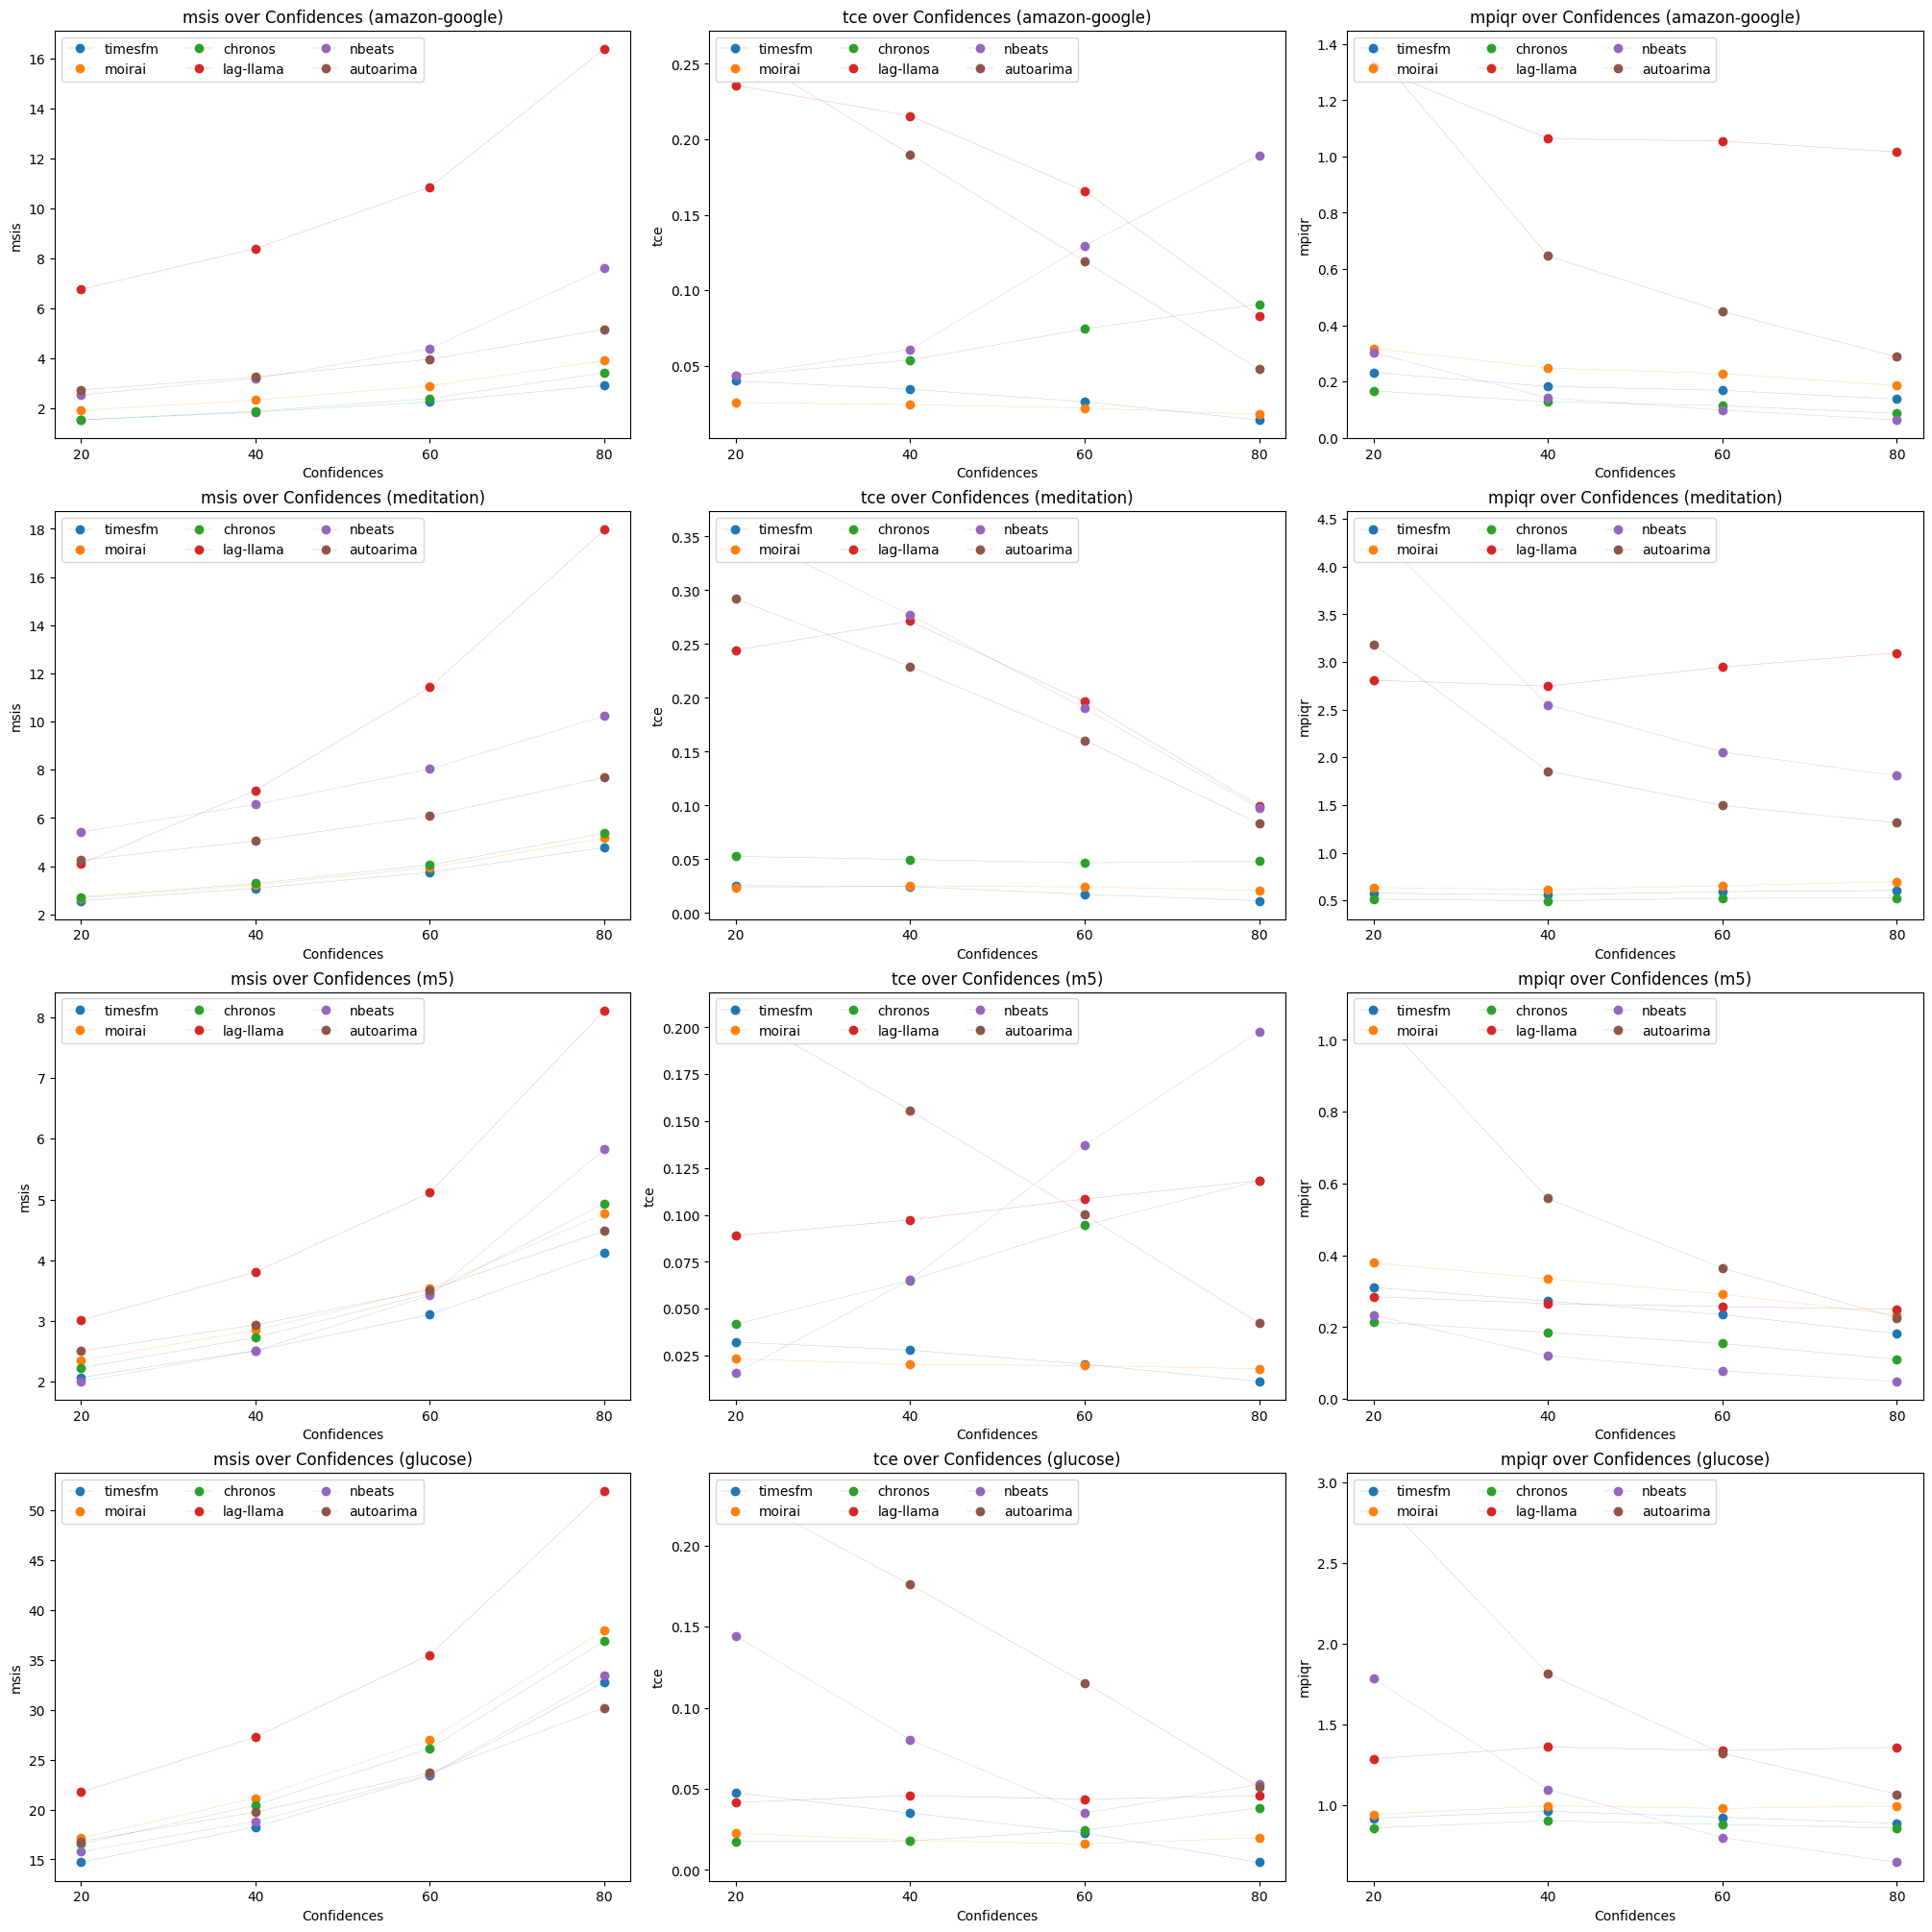

In [ ]:
# Line Plot Metrics over Confidences
q_metrics = ['msis', 'tce', 'mpiqr']
# model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'][:len(models)]
fig, axes = plt.subplots(4, 3, layout='constrained', figsize=(20,20))
for i, dataset in enumerate(datasets):
    for j, metric in enumerate(q_metrics):
        q_metric = [f'{metric}_{confidence}' for confidence in confidences]
        ax = axes[i, j]
        for k, model in enumerate(models):
            y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric'].isin(q_metric)), ['metric', 'avg_result']]
            y = y.sort_values(by='metric')['avg_result'].to_numpy().flatten()
            ax.plot(np.arange(len(confidences)), y, label=model, marker='o', lw=0.3, ls=':')
            
        ax.set_ylabel(metric)
        ax.set_xlabel("Confidences")
        ax.set_title(f'{metric} over Confidences ({dataset})')
        ax.set_xticks(np.arange(len(confidences)), confidences)
        ax.legend(loc='upper left', ncols=3)
    # plt.savefig(f'figures/line_plot_all_metrics_per_pred_len_{dataset}.png')
plt.show()

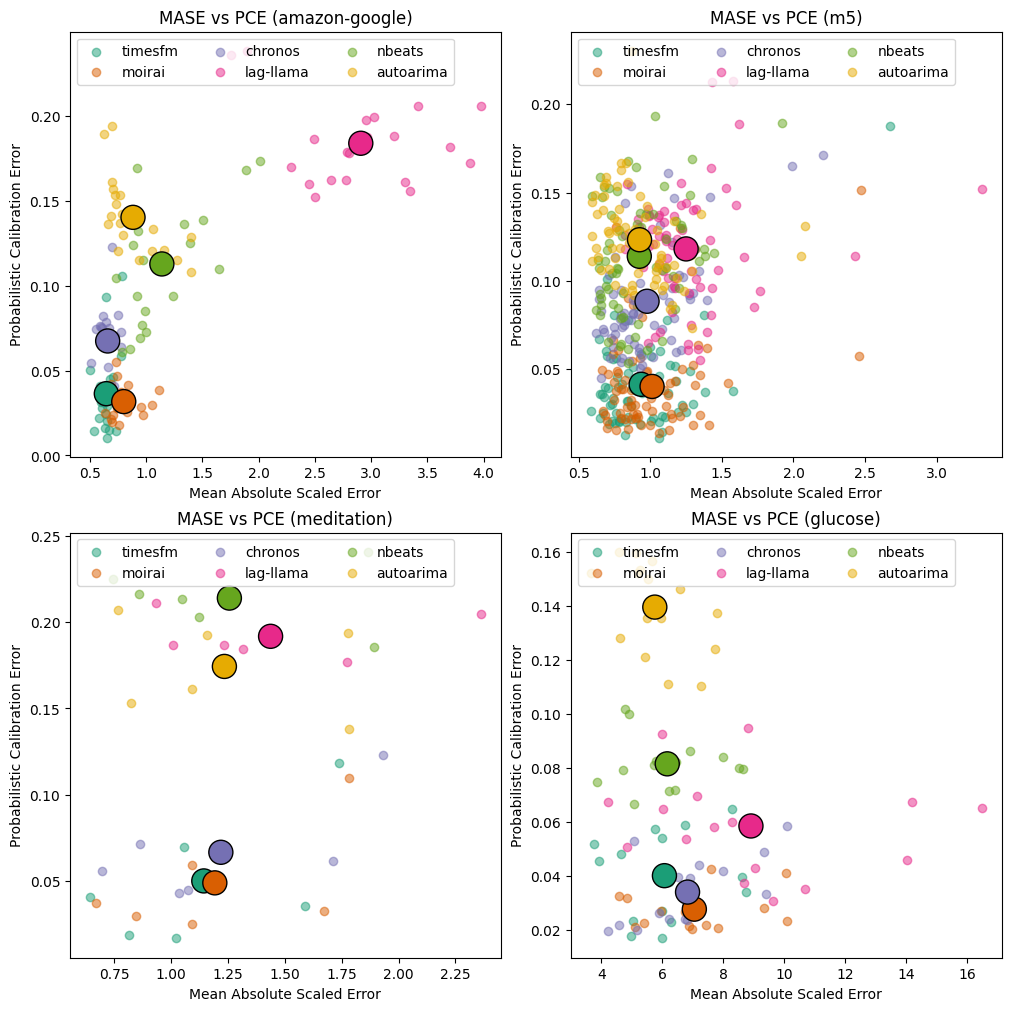

In [48]:
# PCE x MASE plots
fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(10,10))
for i, dataset in enumerate(datasets):
    ax = axes[i%2, i//2]
    x_means = []
    y_means = []
    for model_color, model in zip(model_colors, models):
        time_series_ind = [str(i) for i in range(1,num_timeseries[dataset]+1)]
        x = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']=='mase'), time_series_ind]
        y = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']=='pce'), time_series_ind]
        ax.scatter(x, y, c=model_color, label=model, alpha=0.5)
        x_means.append(np.mean(x))
        y_means.append(np.mean(y))
    
    ax.scatter(x_means, y_means, c=model_colors, s=300, edgecolors='black', alpha=1)
    ax.set_xlabel('Mean Absolute Scaled Error')
    ax.set_ylabel('Probabilistic Calibration Error')
    ax.set_title(f'MASE vs PCE ({dataset})')
    ax.legend(loc='upper left', ncols=3)
plt.savefig(f'figures/scatter_plot_mase_pce.png')
plt.savefig(f'figures/scatter_plot_mase_pce.svg')
plt.show()

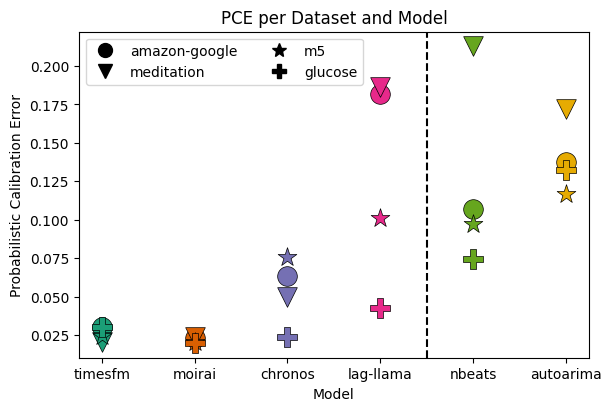

In [35]:
# Plot PCE over datasets
fig, ax = plt.subplots(layout='constrained', figsize=(6,4))

custom_legend_dots = []
# for model, model_color in zip(models, model_colors):
#     custom_legend_dots.append(Line2D([0], [0], color=model_color, lw=4, label=model))
for dataset, marker in zip(datasets, dataset_markers):
    custom_legend_dots.append(Line2D([0], [0], color='black', marker=marker, markersize=10, lw=0))

for dataset, dataset_marker in zip(datasets, dataset_markers):
    for i, model in enumerate(models):
        y = df.loc[(df['metric']=='pce') & (df['model']==model) & (df['dataset']==dataset), 'avg_result'].item()
        ax.scatter(i, y, marker=dataset_marker, c=model_colors[i], s=200, edgecolors='black', lw=0.5)

ax.axvline(3.5, ls='--', color='black')

ax.set_ylabel('Probabilistic Calibration Error')
ax.set_xlabel('Model')
ax.set_title(f'PCE per Dataset and Model')
ax.set_xticks(range(len(models)), models)
ax.legend(custom_legend_dots, [*datasets], ncols=2)
plt.savefig(f'figures/dot_plot_pce.png')
plt.savefig(f'figures/dot_plot_pce.svg')
plt.show()

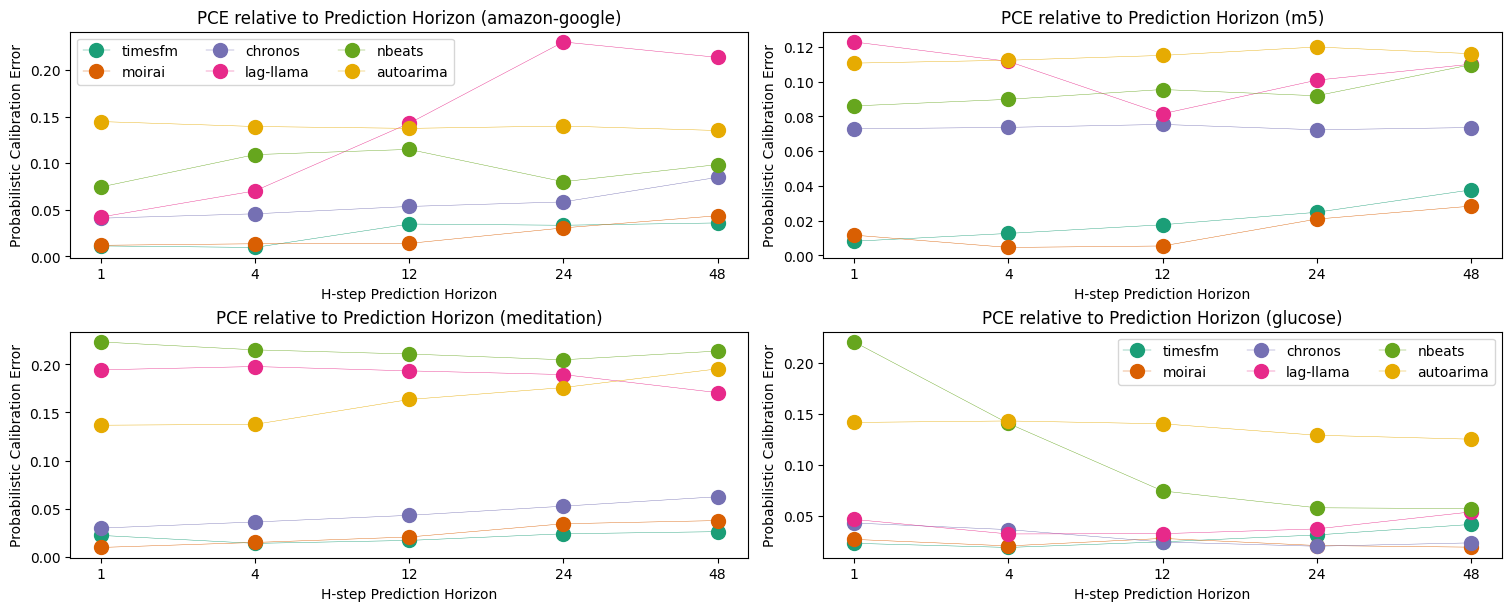

In [49]:
# Line Plot Metrics over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
for i, dataset in enumerate(datasets):
    ax = axes[i%2, i//2]
    for model_color, model in zip(model_colors, models):
        y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']=='pce'), pred_horizon].to_numpy().flatten()
        ax.plot(np.arange(len(pred_horizon)), y, label=model, marker='o', lw=0.3, c=model_color, markersize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.   
    ax.set_ylabel('Probabilistic Calibration Error')
    ax.set_xlabel("H-step Prediction Horizon")
    ax.set_title(f'PCE relative to Prediction Horizon ({dataset})')
    ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
    if i == 0:
        ax.legend(loc='upper left', ncols=3)
    elif i == 3:
        ax.legend(loc='upper right', ncols=3)
    # ax.set_ylim(0,0.25)

plt.savefig(f'figures/line_plot_pce_pred_horizon.png')
plt.savefig(f'figures/line_plot_pce_pred_horizon.svg')
plt.show()